In [126]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [127]:
dataset = pd.read_csv('crypto-markets.csv')

In [128]:
dataset.head()

slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   

    close  volume      market  close_ratio  spread  
0  134.21       0  1500520000       0.5438    3.88  
1  144.54       0  1491160000       0.7813   13.49  
2  139.00       0  1597780000       0.3843   12.88  
3  116.99       0  1542820000       0.2882   32.17  
4  105.21       0  1292190000       0.3881   33.32

In [129]:
dataset.describe()

ranknow          open          high           low         close  \
count  702166.000000  7.021660e+05  7.021660e+05  7.021660e+05  7.021660e+05   
mean      734.561943  2.696117e+02  3.284954e+02  2.210024e+02  2.694796e+02   
std       411.195482  1.219343e+04  1.558344e+04  9.686538e+03  1.217104e+04   
min         1.000000  2.500000e-09  3.200000e-09  9.200000e-14  0.000000e+00   
25%       397.000000  5.280000e-04  6.210000e-04  4.550000e-04  5.290000e-04   
50%       746.000000  8.753000e-03  1.016400e-02  7.630000e-03  8.768000e-03   
75%      1032.000000  1.333997e-01  1.523455e-01  1.170855e-01  1.336785e-01   
max      1516.000000  2.298390e+06  2.926100e+06  2.030590e+06  2.300740e+06   

             volume        market   close_ratio        spread  
count  7.021660e+05  7.021660e+05  7.021660e+05  7.021660e+05  
mean   5.544493e+06  1.202024e+08          -inf  1.074927e+02  
std    1.673788e+08  3.074096e+09           NaN  7.207118e+03  
min    0.000000e+00  0.000000e+00          -inf  0.000000e+00  
25%    2.700000e+01  7.095000e+03  1.429000e-01  0.000000e+00  
50%    5.030000e+02  9.402450e+04  4.331000e-01  0.000000e+00  
75%    1.325400e+04  1.326118e+06  7.703000e-01  3.000000e-02  
max    2.384090e+10  3.261410e+11  1.000000e+00  1.770563e+06

In [130]:
dataset.groupby(['ranknow'])

In [131]:
# dataset.groupby('name')

In [132]:
dataset['name'].describe()

count       702166
unique        1514
top       HempCoin
freq          2030
Name: name, dtype: object

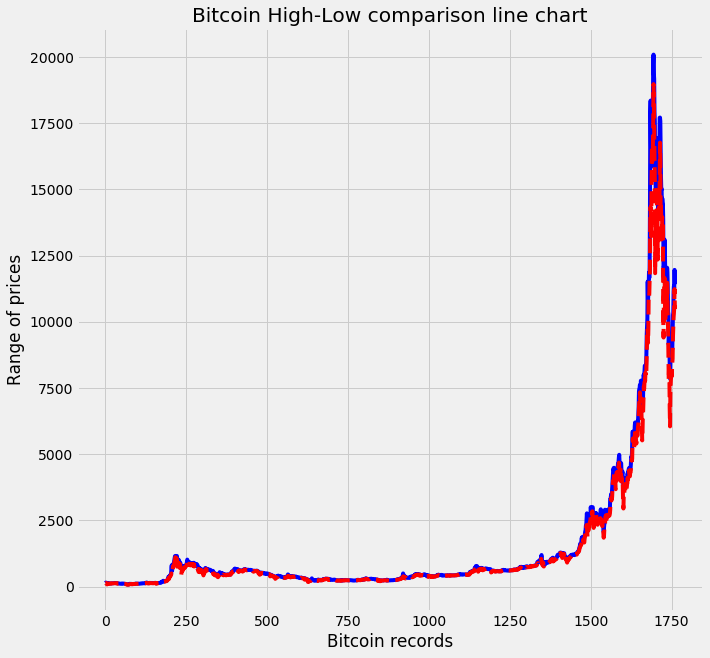

In [133]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
d = dataset[dataset['name'] == 'Bitcoin']
plt.plot(d['high'],'b',d['low'],'r--')
plt.title('Bitcoin High-Low comparison line chart')
plt.ylabel('Range of prices')
plt.xlabel('Bitcoin records')
plt.show()
# plt.lagends()

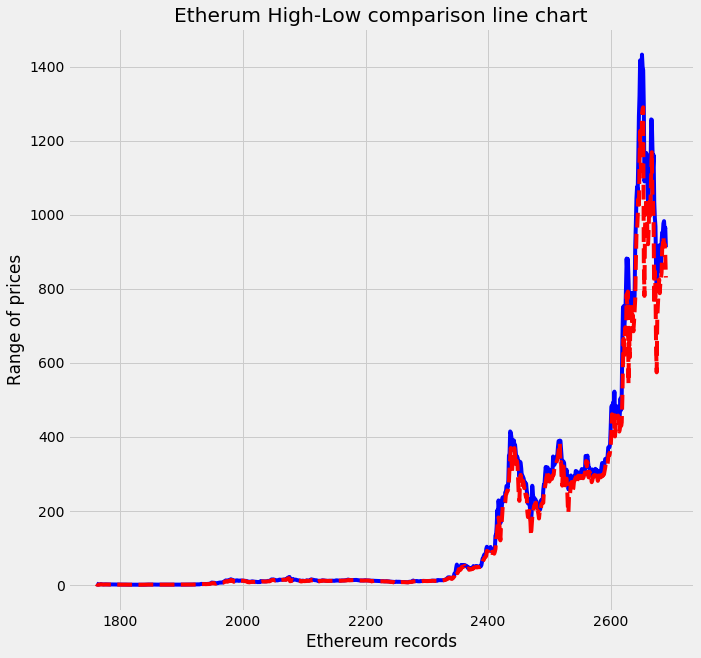

In [134]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
d = dataset[dataset['name'] == 'Ethereum']
plt.plot(d['high'],'b',d['low'],'r--')
plt.title('Etherum High-Low comparison line chart')
plt.ylabel('Range of prices')
plt.xlabel('Ethereum records')
plt.show()

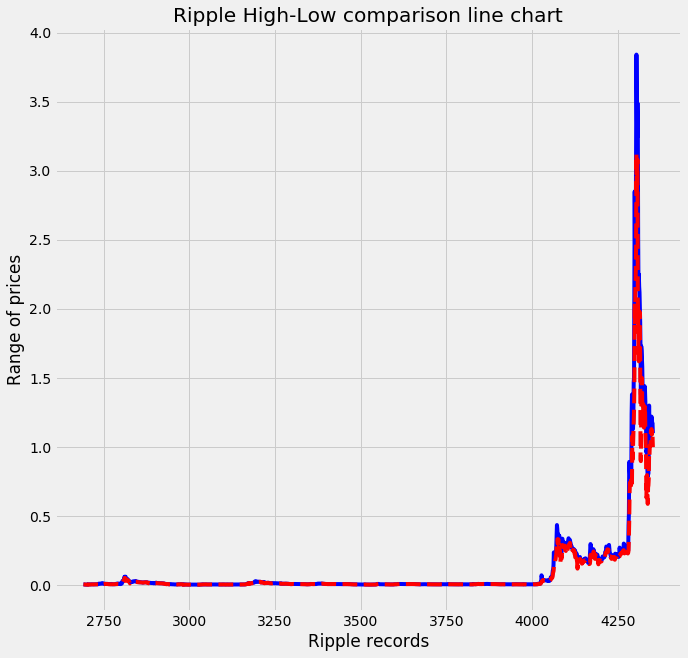

In [135]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
d = dataset[dataset['name'] == 'Ripple']
plt.plot(d['high'],'b',d['low'],'r--')
plt.title('Ripple High-Low comparison line chart')
plt.ylabel('Range of prices')
plt.xlabel('Ripple records')
plt.show()

In [136]:
# import matplotlib.pyplot as plt
# d = dataset[dataset['name'] == 'HempCoin']
# plt.plot(d['high'],'b',d['low'],'r--')
# plt.show()

# Min-Max Normalization

In [137]:
import pandas as pd
scaler = MinMaxScaler()
dat = dataset[['open','high', 'low', 'close', 'market', 'volume']]
scaler.fit(dat)
dat = scaler.transform(dat)
commonScaleData = pd.DataFrame(dat,columns=['open','high', 'low', 'close', 'market', 'volume'])
namesDF = pd.DataFrame(dataset['name'],columns = ['name'])
dateDf = pd.DataFrame(pd.to_datetime(dataset['date']),columns = ['date'])
MinMaxNormalizeData=pd.concat([ dateDf, namesDF, commonScaleData ], axis=1)
# commonScaleData

In [138]:
MinMaxNormalizeData

date     name          open          high           low  \
0      2013-04-28  Bitcoin  5.886729e-05  4.647141e-05  6.505498e-05   
1      2013-04-29  Bitcoin  5.849312e-05  5.040498e-05  6.599067e-05   
2      2013-04-30  Bitcoin  6.265255e-05  5.021359e-05  6.601530e-05   
3      2013-05-01  Bitcoin  6.047712e-05  4.780766e-05  5.304862e-05   
4      2013-05-02  Bitcoin  5.063544e-05  4.292403e-05  4.544492e-05   
5      2013-05-03  Bitcoin  4.622801e-05  3.695362e-05  3.895420e-05   
6      2013-05-04  Bitcoin  4.268205e-05  3.930146e-05  4.555326e-05   
7      2013-05-05  Bitcoin  4.912134e-05  4.060012e-05  5.276299e-05   
8      2013-05-06  Bitcoin  5.046141e-05  4.260278e-05  5.251676e-05   
9      2013-05-07  Bitcoin  4.883853e-05  3.876833e-05  4.811409e-05   
10     2013-05-08  Bitcoin  4.768555e-05  3.956803e-05  5.397446e-05   
11     2013-05-09  Bitcoin  4.925187e-05  3.877516e-05  5.380702e-05   
12     2013-05-10  Bitcoin  4.907783e-05  4.169372e-05  5.493477e-05   
13     2013-05-11  Bitcoin  5.120976e-05  4.055911e-05  5.565378e-05   
14     2013-05-12  Bitcoin  5.031348e-05  4.013875e-05  5.586554e-05   
15     2013-05-13  Bitcoin  4.995671e-05  4.056594e-05  5.638755e-05   
16     2013-05-14  Bitcoin  5.133158e-05  4.094187e-05  5.429456e-05   
17     2013-05-15  Bitcoin  4.846871e-05  3.957828e-05  5.097041e-05   
18     2013-05-16  Bitcoin  4.969566e-05  4.058645e-05  5.525488e-05   
19     2013-05-17  Bitcoin  5.143165e-05  4.282150e-05  5.740696e-05   
20     2013-05-18  Bitcoin  5.373327e-05  4.280442e-05  6.022880e-05   
21     2013-05-19  Bitcoin  5.360709e-05  4.254810e-05  5.888436e-05   
22     2013-05-20  Bitcoin  5.329818e-05  4.224736e-05  5.915522e-05   
23     2013-05-21  Bitcoin  5.308934e-05  4.203547e-05  5.969201e-05   
24     2013-05-22  Bitcoin  5.346786e-05  4.237723e-05  6.008106e-05   
25     2013-05-23  Bitcoin  5.386379e-05  4.337856e-05  6.062277e-05   
26     2013-05-24  Bitcoin  5.495151e-05  4.574348e-05  6.191304e-05   
27     2013-05-25  Bitcoin  5.791010e-05  4.552818e-05  6.347909e-05   
28     2013-05-26  Bitcoin  5.742716e-05  4.647825e-05  6.432613e-05   
29     2013-05-27  Bitcoin  5.808414e-05  4.629712e-05  6.141072e-05   
...           ...      ...           ...           ...           ...   
702136 2017-12-02     OCOW  2.101905e-09  1.683468e-09  2.329372e-09   
702137 2017-12-03     OCOW  2.092768e-09  1.684835e-09  2.353011e-09   
702138 2017-12-09     OCOW  4.020195e-10  3.168028e-10  4.003762e-10   
702139 2017-12-10     OCOW  3.924475e-10  3.082590e-10  3.910194e-10   
702140 2017-12-12     OCOW  2.628796e-09  2.124328e-09  2.940032e-09   
702141 2017-12-13     OCOW  2.630971e-09  2.093912e-09  2.746985e-09   
702142 2017-12-14     OCOW  2.493483e-09  2.040941e-09  2.188526e-09   
702143 2017-12-15     OCOW  1.948754e-09  1.667748e-09  3.910194e-10   
702144 2017-12-16     OCOW  3.872167e-11  1.619219e-09  4.382963e-11   
702145 2017-12-17     OCOW  2.493039e-10  2.532370e-10  7.534756e-11   
702146 2017-12-18     OCOW  8.310056e-11  9.022139e-11  4.629196e-11   
702147 2017-12-19     OCOW  7.309356e-11  7.655131e-11  5.121664e-11   
702148 2017-12-20     OCOW  6.917777e-11  2.511865e-10  2.462339e-11   
702149 2017-12-21     OCOW  7.178830e-11  8.304460e-11  6.008106e-11   
702150 2017-12-22     OCOW  5.481990e-11  4.784416e-11  6.402080e-12   
702151 2017-12-23     OCOW  6.090133e-12  1.059321e-11  6.894548e-12   
702152 2017-12-24     OCOW  6.525220e-12  9.909709e-12  6.402080e-12   
702153 2017-12-25     OCOW  1.218135e-11  1.435248e-11  6.402080e-12   
702154 2017-12-26     OCOW  6.090133e-12  5.466936e-12  6.894548e-12   
702155 2017-12-27     OCOW  6.960307e-12  1.093496e-11  7.387016e-12   
702156 2017-12-28     OCOW  6.960307e-12  5.466936e-12  6.894548e-12   
702157 2017-12-29     OCOW  6.525220e-12  1.025146e-11  6.894548e-12   
702158 2017-12-30     OCOW  6.090133e-12  9.909709e-12  6.402080e-12   
702159 2017-12-31     OCOW  1.087609e-11  9.567957e-1

In [139]:
# import matplotlib.pyplot as plt
# selectedBitcoin = dat[dat['name'] == 'Bitcoin']
# selectedHempCoin = dat[dat['name'] == 'HempCoin']
# selectedEthereum = dat[dat['name'] == 'Ethereum']
# selectedRipple = dat[dat['name'] == 'Ripple']
# Bitcoin = pd.DataFrame(selectedBitcoin.as_matrix(), columns = ['name','open','high', 'low', 'close'])
# Ethereum = pd.DataFrame(selectedHempCoin.as_matrix(), columns = ['name','open','high', 'low', 'close'])
# HempCoin = pd.DataFrame(selectedEthereum.as_matrix(), columns = ['name','open','high', 'low', 'close'])
# Ripple = pd.DataFrame(selectedRipple.as_matrix(), columns = ['name','open','high', 'low', 'close'])
# plt.title('Comparing the high Value')
# plt.plot(Bitcoin['high'],'b',Ethereum['high'], 'r' )
# plt.show()
# plt.title('Comparing the low Value')
# plt.plot(Bitcoin['high'],'b', Ethereum['low'], 'r' )
# plt.show()

In [140]:
dataset

slug symbol     name        date  ranknow        open        high  \
0       bitcoin    BTC  Bitcoin  2013-04-28        1  135.300000  135.980000   
1       bitcoin    BTC  Bitcoin  2013-04-29        1  134.440000  147.490000   
2       bitcoin    BTC  Bitcoin  2013-04-30        1  144.000000  146.930000   
3       bitcoin    BTC  Bitcoin  2013-05-01        1  139.000000  139.890000   
4       bitcoin    BTC  Bitcoin  2013-05-02        1  116.380000  125.600000   
5       bitcoin    BTC  Bitcoin  2013-05-03        1  106.250000  108.130000   
6       bitcoin    BTC  Bitcoin  2013-05-04        1   98.100000  115.000000   
7       bitcoin    BTC  Bitcoin  2013-05-05        1  112.900000  118.800000   
8       bitcoin    BTC  Bitcoin  2013-05-06        1  115.980000  124.660000   
9       bitcoin    BTC  Bitcoin  2013-05-07        1  112.250000  113.440000   
10      bitcoin    BTC  Bitcoin  2013-05-08        1  109.600000  115.780000   
11      bitcoin    BTC  Bitcoin  2013-05-09        1  113.200000  113.460000   
12      bitcoin    BTC  Bitcoin  2013-05-10        1  112.800000  122.000000   
13      bitcoin    BTC  Bitcoin  2013-05-11        1  117.700000  118.680000   
14      bitcoin    BTC  Bitcoin  2013-05-12        1  115.640000  117.450000   
15      bitcoin    BTC  Bitcoin  2013-05-13        1  114.820000  118.700000   
16      bitcoin    BTC  Bitcoin  2013-05-14        1  117.980000  119.800000   
17      bitcoin    BTC  Bitcoin  2013-05-15        1  111.400000  115.810000   
18      bitcoin    BTC  Bitcoin  2013-05-16        1  114.220000  118.760000   
19      bitcoin    BTC  Bitcoin  2013-05-17        1  118.210000  125.300000   
20      bitcoin    BTC  Bitcoin  2013-05-18        1  123.500000  125.250000   
21      bitcoin    BTC  Bitcoin  2013-05-19        1  123.210000  124.500000   
22      bitcoin    BTC  Bitcoin  2013-05-20        1  122.500000  123.620000   
23      bitcoin    BTC  Bitcoin  2013-05-21        1  122.020000  123.000000   
24      bitcoin    BTC  Bitcoin  2013-05-22        1  122.890000  124.000000   
25      bitcoin    BTC  Bitcoin  2013-05-23        1  123.800000  126.930000   
26      bitcoin    BTC  Bitcoin  2013-05-24        1  126.300000  133.850000   
27      bitcoin    BTC  Bitcoin  2013-05-25        1  133.100000  133.220000   
28      bitcoin    BTC  Bitcoin  2013-05-26        1  131.990000  136.000000   
29      bitcoin    BTC  Bitcoin  2013-05-27        1  133.500000  135.470000   
...         ...    ...      ...         ...      ...         ...         ...   
702136     ocow   OCOW     OCOW  2017-12-02     1516    0.004831    0.004926   
702137     ocow   OCOW     OCOW  2017-12-03     1516    0.004810    0.004930   
702138     ocow   OCOW     OCOW  2017-12-09     1516    0.000924    0.000927   
702139     ocow   OCOW     OCOW  2017-12-10     1516    0.000902    0.000902   
702140     ocow   OCOW     OCOW  2017-12-12     1516    0.006042    0.006216   
702141     ocow   OCOW     OCOW  2017-12-13     1516    0.006047    0.006127   
702142     ocow   OCOW     OCOW  2017-12-14     1516    0.005731    0.005972   
702143     ocow   OCOW     OCOW  2017-12-15     1516    0.004479    0.004880   
702144     ocow   OCOW     OCOW  2017-12-16     1516    0.000089    0.004738   
702145     ocow   OCOW     OCOW  2017-12-17     1516    0.000573    0.000741   
702146     ocow   OCOW     OCOW  2017-12-18     1516    0.000191    0.000264   
702147     ocow   OCOW     OCOW  2017-12-19     1516    0.000168    0.000224   
702148     ocow   OCOW     OCOW  2017-12-20     1516    0.000159    0.000735   
702149     ocow   OCOW     OCOW  2017-12-21     1516    0.000165    0.000243   
702150     ocow   OCOW     OCOW  2017-12-22     1516    0.000126    0.000140   
702151     ocow   OCOW     OCOW  2017-12-23     1516    0.000014    0.000031   
702152     ocow   OCOW     OCOW  2017-12-24     1516    0.000015    0.000029   
702153     ocow   OCOW     OCOW  2017-12-25     1516    0.000028    0.000042   
702154     

In [141]:
# grouping data first on the basis on date and then on the basis of name, then depicting the market mean of this data
#  
marketData = dataset.groupby(['date', 'name']).mean().unstack()
# makretData = marketData.unstack()
# ['market'].mean().unstack()
# plt.plot(marketData['high'])
# plt.show()
marketData

ranknow                                                             \
name            0x  2GIVE 300 Token 42-coin 808Coin    8Bit ACChain AI Doctor   
date                                                                            
2013-04-28     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-04-29     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-04-30     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-01     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-02     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-03     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-04     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-05     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-06     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-07     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-08     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-09     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-10     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-11     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-12     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-13     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-14     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-15     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-16     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-17     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-18     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-19     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-20     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-21     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-22     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-23     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-24     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-25     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-26     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-27     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
...            ...    ...       ...     ...     ...     ...     ...       ...   
2018-01-23    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-24    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-25    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-26    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-27    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-28    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-29    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-30    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-31    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-01    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-02    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-03    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-04    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-05    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-06    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-07    44.0  552.0     909.0   660.

In [142]:
plt.show()

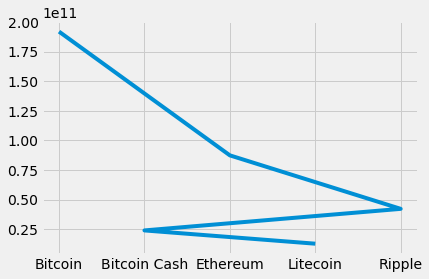

In [143]:
# Ordered most frequent currencies
marketData = dataset.groupby(['name'])['market']
marketData = marketData.last()
OrderedmarketData = marketData.sort_values(ascending=False)
# OrderedMostFrequencyIndexes = marketData.sort_values(ascending=False).index
# MostFrequentOrderedData = dataset[dataset['name'].isin(OrderedMostFrequencyIndexes)]
# marketData = marketData.head(5)
# marketData
plt.plot(OrderedmarketData.head(5))
plt.show()
top_5_frquennt_currencies_names = OrderedmarketData.head(5).index
top_5_frequent_currencies_allData = dataset[dataset['name'].isin(top_5_frquennt_currencies_names)]
# top 5 frequent data
# OrderedmarketData.head
# top_5_frequent_currencies_allData

/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


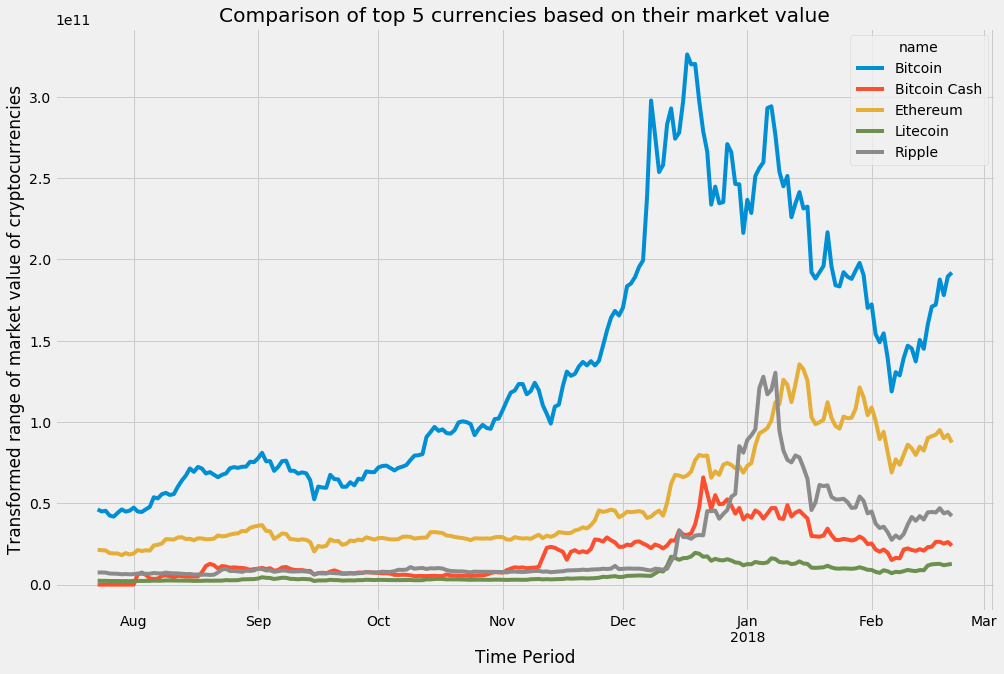

In [144]:
import matplotlib.dates as xaxisdates
# fig,ax = plt.subplots(figsize=(10, 10))
# ax.xaxis_date() 
# ax.xaxis.set_major_formatter(xaxisdates.DateFormatter('%Y-%m-%d'))
# plt.plot(marketCapTrendOfTop5Currencies_dropNA)
# plt.title('Comparison of top 5 currencies based on their market value')
# plt.ylabel('Transformed range of market value of cryptocurrencies')
# plt.xlabel('Time Period')
# plt.gcf().autofmt_xdate()
top_5_frequent_currencies_allData['date'] = pd.to_datetime(top_5_frequent_currencies_allData['date'])
top_5_frequent_currencies_allData
# marketCapTrendOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])
marketCapTrendOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])['market'].mean().unstack()
# marketCapTrendOfTop5Currencies

# marketCapTrendOfTop5Currencies_fillNa = marketCapTrendOfTop5Currencies.fillna(method = 'bfill', axis = 1)
# marketCapTrendOfTop5Currencies_fillNa.plot(legend=True,figsize=(10, 10), 
#                                             title='Comparison of top 5 currencies based on their market value')
# plt.ylabel('Transformed range of market value of cryptocurrencies')
# plt.xlabel('Time Period')
# plt.show()
plt.style.use('fivethirtyeight')

marketCapTrendOfTop5Currencies_dropNA = marketCapTrendOfTop5Currencies.dropna(axis=0, how='any')
marketCapTrendOfTop5Currencies_dropNA.plot(legend=True,figsize=(15, 10), 
                                            title='Comparison of top 5 currencies based on their market value')
plt.ylabel('Transformed range of market value of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

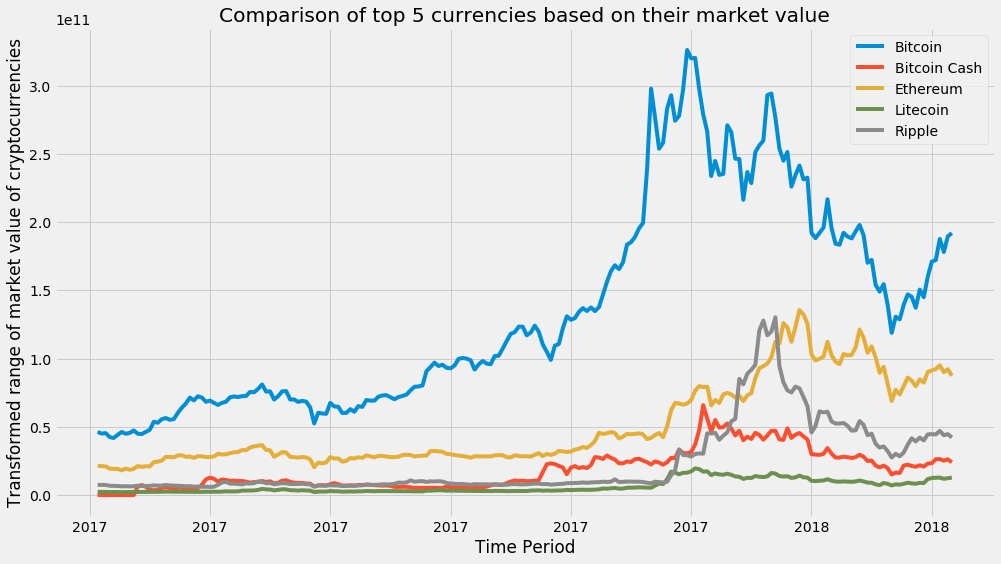

In [145]:
import matplotlib.pyplot as plt
import matplotlib.dates as xaxisdates
fig,ax = plt.subplots(figsize=(15, 10))
# ax.xaxis_date() 
# ax.set_xticks([], minor=True)
ax.xaxis.set_major_locator(xaxisdates.DayLocator(interval = 30))
# ax.xaxis.set_major_formatter(xaxisdates.DateFormatter('%m-%Y'))
plt.xticks(fontsize = 8)
# ax.xaxis_date()
plt.gcf().autofmt_xdate()
marketCapTrendOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])['market'].mean().unstack()
marketCapTrendOfTop5Currencies_dropNA = marketCapTrendOfTop5Currencies.dropna(axis=0, how='any')
plt.plot(marketCapTrendOfTop5Currencies_dropNA.index,marketCapTrendOfTop5Currencies_dropNA.values)
plt.title('Comparison of top 5 currencies based on their market value')
plt.ylabel('Transformed range of market value of cryptocurrencies')
plt.xlabel('Time Period')
plt.legend(marketCapTrendOfTop5Currencies_dropNA.columns)
plt.show()

In [146]:
# marketCapTrendOfTop5Currencies_dropNA.index

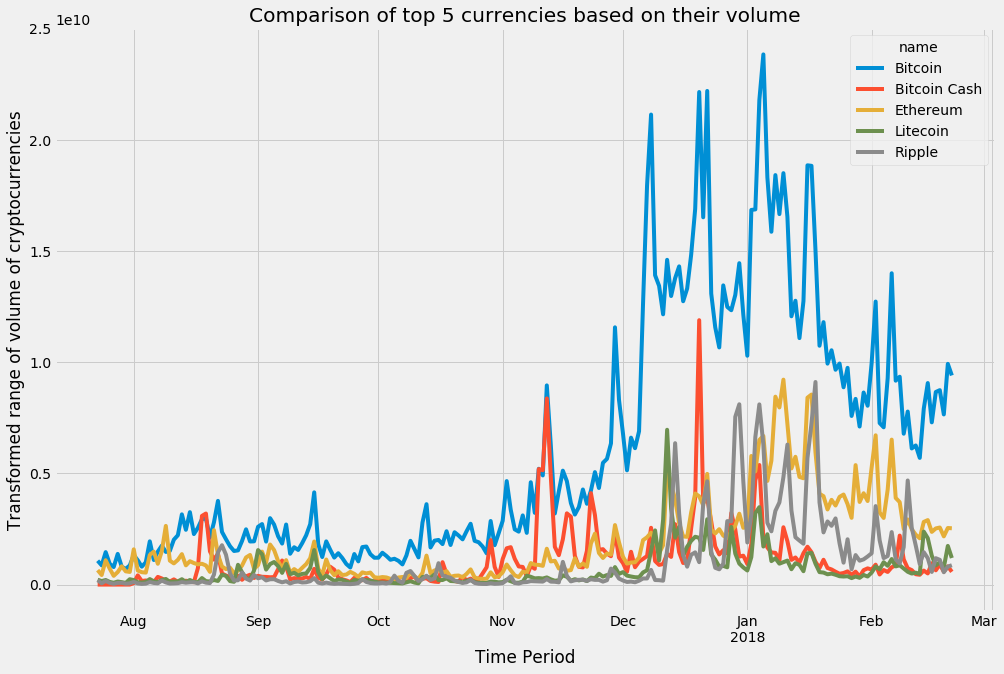

In [147]:
VolumeTrendOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])['volume'].mean().unstack()
VolumeTrendOfTop5Currencies_dropNA = VolumeTrendOfTop5Currencies.dropna(axis=0, how='any')
# plt.title('Comparison of top 5 currencies based on their volume')
# plt.ylabel('Transformed range of volume of cryptocurrencies')
# plt.xlabel('Time Period')
# plt.plot(marketCapTrendOfTop5Currencies)
# plt.legend()
plt.style.use('fivethirtyeight')
VolumeTrendOfTop5Currencies_dropNA.plot(legend=True,figsize=(15, 10), 
                                        title='Comparison of top 5 currencies based on their volume')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
# plt.gcf().autofmt_xdate()
plt.show()

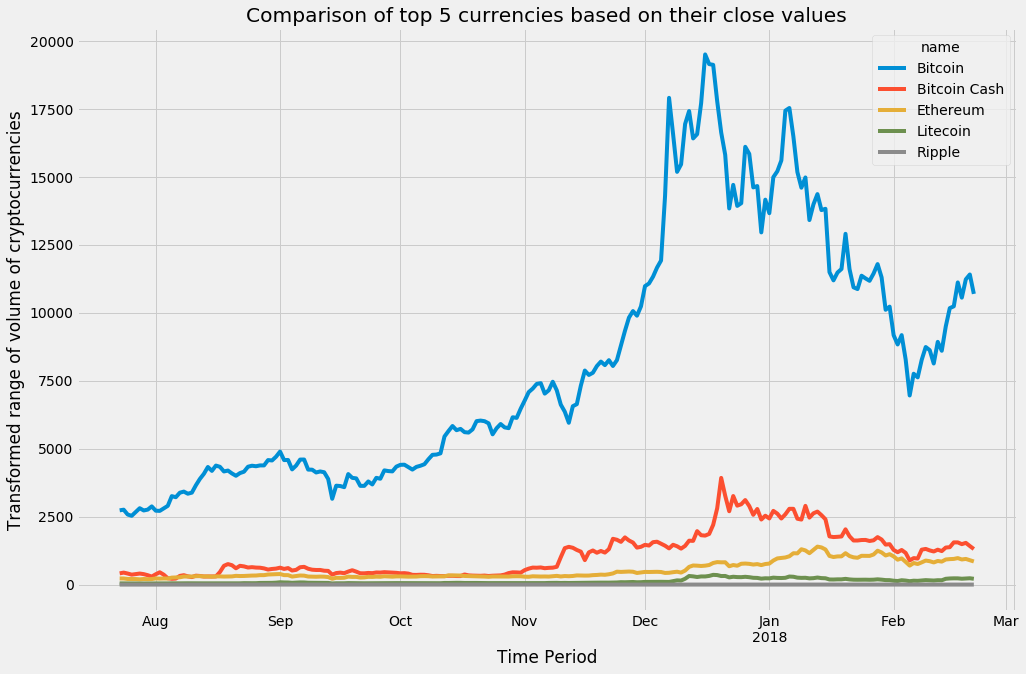

In [148]:
top5CurrenciesPricePerUnit = top_5_frequent_currencies_allData.groupby(['date','name'])['close'].mean().unstack()
top5CurrenciesPricePerUnit_dropNA = top5CurrenciesPricePerUnit.dropna(axis=0, how='any')
plt.style.use('fivethirtyeight')
# plt.plot(marketCapTrendOfTop5Currencies)
# fig = plt.figure(figsize=(10, 10))
# plt.title('Comparison of top 5 currencies based on their volume')
top5CurrenciesPricePerUnit_dropNA.plot(legend=True,figsize=(15, 10), 
                                        title='Comparison of top 5 currencies based on their close values')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

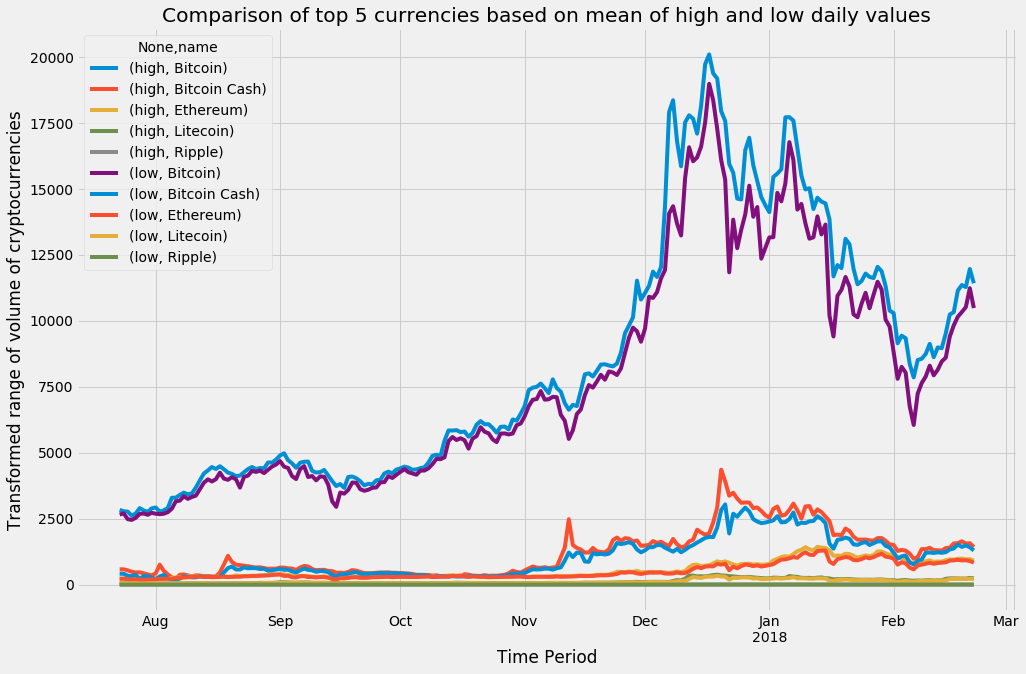

In [149]:
FluctuationOfTop5Currencies = top_5_frequent_currencies_allData.groupby(['date','name'])['high','low'].mean().unstack()
FluctuationOfTop5Currencies_dropNA = FluctuationOfTop5Currencies.dropna(axis=0, how='any')
FluctuationOfTop5Currencies_dropNA.plot(legend=True,figsize=(15, 10), 
                                        title='Comparison of top 5 currencies based on mean of high and low daily values')
# plt.style.reset()
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
# plt.plot(marketCapTrendOfTop5Currencies)
plt.show()

In [150]:
dataset

slug symbol     name        date  ranknow        open        high  \
0       bitcoin    BTC  Bitcoin  2013-04-28        1  135.300000  135.980000   
1       bitcoin    BTC  Bitcoin  2013-04-29        1  134.440000  147.490000   
2       bitcoin    BTC  Bitcoin  2013-04-30        1  144.000000  146.930000   
3       bitcoin    BTC  Bitcoin  2013-05-01        1  139.000000  139.890000   
4       bitcoin    BTC  Bitcoin  2013-05-02        1  116.380000  125.600000   
5       bitcoin    BTC  Bitcoin  2013-05-03        1  106.250000  108.130000   
6       bitcoin    BTC  Bitcoin  2013-05-04        1   98.100000  115.000000   
7       bitcoin    BTC  Bitcoin  2013-05-05        1  112.900000  118.800000   
8       bitcoin    BTC  Bitcoin  2013-05-06        1  115.980000  124.660000   
9       bitcoin    BTC  Bitcoin  2013-05-07        1  112.250000  113.440000   
10      bitcoin    BTC  Bitcoin  2013-05-08        1  109.600000  115.780000   
11      bitcoin    BTC  Bitcoin  2013-05-09        1  113.200000  113.460000   
12      bitcoin    BTC  Bitcoin  2013-05-10        1  112.800000  122.000000   
13      bitcoin    BTC  Bitcoin  2013-05-11        1  117.700000  118.680000   
14      bitcoin    BTC  Bitcoin  2013-05-12        1  115.640000  117.450000   
15      bitcoin    BTC  Bitcoin  2013-05-13        1  114.820000  118.700000   
16      bitcoin    BTC  Bitcoin  2013-05-14        1  117.980000  119.800000   
17      bitcoin    BTC  Bitcoin  2013-05-15        1  111.400000  115.810000   
18      bitcoin    BTC  Bitcoin  2013-05-16        1  114.220000  118.760000   
19      bitcoin    BTC  Bitcoin  2013-05-17        1  118.210000  125.300000   
20      bitcoin    BTC  Bitcoin  2013-05-18        1  123.500000  125.250000   
21      bitcoin    BTC  Bitcoin  2013-05-19        1  123.210000  124.500000   
22      bitcoin    BTC  Bitcoin  2013-05-20        1  122.500000  123.620000   
23      bitcoin    BTC  Bitcoin  2013-05-21        1  122.020000  123.000000   
24      bitcoin    BTC  Bitcoin  2013-05-22        1  122.890000  124.000000   
25      bitcoin    BTC  Bitcoin  2013-05-23        1  123.800000  126.930000   
26      bitcoin    BTC  Bitcoin  2013-05-24        1  126.300000  133.850000   
27      bitcoin    BTC  Bitcoin  2013-05-25        1  133.100000  133.220000   
28      bitcoin    BTC  Bitcoin  2013-05-26        1  131.990000  136.000000   
29      bitcoin    BTC  Bitcoin  2013-05-27        1  133.500000  135.470000   
...         ...    ...      ...         ...      ...         ...         ...   
702136     ocow   OCOW     OCOW  2017-12-02     1516    0.004831    0.004926   
702137     ocow   OCOW     OCOW  2017-12-03     1516    0.004810    0.004930   
702138     ocow   OCOW     OCOW  2017-12-09     1516    0.000924    0.000927   
702139     ocow   OCOW     OCOW  2017-12-10     1516    0.000902    0.000902   
702140     ocow   OCOW     OCOW  2017-12-12     1516    0.006042    0.006216   
702141     ocow   OCOW     OCOW  2017-12-13     1516    0.006047    0.006127   
702142     ocow   OCOW     OCOW  2017-12-14     1516    0.005731    0.005972   
702143     ocow   OCOW     OCOW  2017-12-15     1516    0.004479    0.004880   
702144     ocow   OCOW     OCOW  2017-12-16     1516    0.000089    0.004738   
702145     ocow   OCOW     OCOW  2017-12-17     1516    0.000573    0.000741   
702146     ocow   OCOW     OCOW  2017-12-18     1516    0.000191    0.000264   
702147     ocow   OCOW     OCOW  2017-12-19     1516    0.000168    0.000224   
702148     ocow   OCOW     OCOW  2017-12-20     1516    0.000159    0.000735   
702149     ocow   OCOW     OCOW  2017-12-21     1516    0.000165    0.000243   
702150     ocow   OCOW     OCOW  2017-12-22     1516    0.000126    0.000140   
702151     ocow   OCOW     OCOW  2017-12-23     1516    0.000014    0.000031   
702152     ocow   OCOW     OCOW  2017-12-24     1516    0.000015    0.000029   
702153     ocow   OCOW     OCOW  2017-12-25     1516    0.000028    0.000042   
702154     

In [151]:
dataset['date']

0         2013-04-28
1         2013-04-29
2         2013-04-30
3         2013-05-01
4         2013-05-02
5         2013-05-03
6         2013-05-04
7         2013-05-05
8         2013-05-06
9         2013-05-07
10        2013-05-08
11        2013-05-09
12        2013-05-10
13        2013-05-11
14        2013-05-12
15        2013-05-13
16        2013-05-14
17        2013-05-15
18        2013-05-16
19        2013-05-17
20        2013-05-18
21        2013-05-19
22        2013-05-20
23        2013-05-21
24        2013-05-22
25        2013-05-23
26        2013-05-24
27        2013-05-25
28        2013-05-26
29        2013-05-27
             ...    
702136    2017-12-02
702137    2017-12-03
702138    2017-12-09
702139    2017-12-10
702140    2017-12-12
702141    2017-12-13
702142    2017-12-14
702143    2017-12-15
702144    2017-12-16
702145    2017-12-17
702146    2017-12-18
702147    2017-12-19
702148    2017-12-20
702149    2017-12-21
702150    2017-12-22
702151    2017-12-23
702152    201

In [152]:
# df['DOB1'] = df['DOB'].dt.strftime('%m/%d/%Y')
dataset['year'] = pd.to_datetime(dataset['date']).dt.strftime('%Y')

In [153]:
dataset

slug symbol     name        date  ranknow        open        high  \
0       bitcoin    BTC  Bitcoin  2013-04-28        1  135.300000  135.980000   
1       bitcoin    BTC  Bitcoin  2013-04-29        1  134.440000  147.490000   
2       bitcoin    BTC  Bitcoin  2013-04-30        1  144.000000  146.930000   
3       bitcoin    BTC  Bitcoin  2013-05-01        1  139.000000  139.890000   
4       bitcoin    BTC  Bitcoin  2013-05-02        1  116.380000  125.600000   
5       bitcoin    BTC  Bitcoin  2013-05-03        1  106.250000  108.130000   
6       bitcoin    BTC  Bitcoin  2013-05-04        1   98.100000  115.000000   
7       bitcoin    BTC  Bitcoin  2013-05-05        1  112.900000  118.800000   
8       bitcoin    BTC  Bitcoin  2013-05-06        1  115.980000  124.660000   
9       bitcoin    BTC  Bitcoin  2013-05-07        1  112.250000  113.440000   
10      bitcoin    BTC  Bitcoin  2013-05-08        1  109.600000  115.780000   
11      bitcoin    BTC  Bitcoin  2013-05-09        1  113.200000  113.460000   
12      bitcoin    BTC  Bitcoin  2013-05-10        1  112.800000  122.000000   
13      bitcoin    BTC  Bitcoin  2013-05-11        1  117.700000  118.680000   
14      bitcoin    BTC  Bitcoin  2013-05-12        1  115.640000  117.450000   
15      bitcoin    BTC  Bitcoin  2013-05-13        1  114.820000  118.700000   
16      bitcoin    BTC  Bitcoin  2013-05-14        1  117.980000  119.800000   
17      bitcoin    BTC  Bitcoin  2013-05-15        1  111.400000  115.810000   
18      bitcoin    BTC  Bitcoin  2013-05-16        1  114.220000  118.760000   
19      bitcoin    BTC  Bitcoin  2013-05-17        1  118.210000  125.300000   
20      bitcoin    BTC  Bitcoin  2013-05-18        1  123.500000  125.250000   
21      bitcoin    BTC  Bitcoin  2013-05-19        1  123.210000  124.500000   
22      bitcoin    BTC  Bitcoin  2013-05-20        1  122.500000  123.620000   
23      bitcoin    BTC  Bitcoin  2013-05-21        1  122.020000  123.000000   
24      bitcoin    BTC  Bitcoin  2013-05-22        1  122.890000  124.000000   
25      bitcoin    BTC  Bitcoin  2013-05-23        1  123.800000  126.930000   
26      bitcoin    BTC  Bitcoin  2013-05-24        1  126.300000  133.850000   
27      bitcoin    BTC  Bitcoin  2013-05-25        1  133.100000  133.220000   
28      bitcoin    BTC  Bitcoin  2013-05-26        1  131.990000  136.000000   
29      bitcoin    BTC  Bitcoin  2013-05-27        1  133.500000  135.470000   
...         ...    ...      ...         ...      ...         ...         ...   
702136     ocow   OCOW     OCOW  2017-12-02     1516    0.004831    0.004926   
702137     ocow   OCOW     OCOW  2017-12-03     1516    0.004810    0.004930   
702138     ocow   OCOW     OCOW  2017-12-09     1516    0.000924    0.000927   
702139     ocow   OCOW     OCOW  2017-12-10     1516    0.000902    0.000902   
702140     ocow   OCOW     OCOW  2017-12-12     1516    0.006042    0.006216   
702141     ocow   OCOW     OCOW  2017-12-13     1516    0.006047    0.006127   
702142     ocow   OCOW     OCOW  2017-12-14     1516    0.005731    0.005972   
702143     ocow   OCOW     OCOW  2017-12-15     1516    0.004479    0.004880   
702144     ocow   OCOW     OCOW  2017-12-16     1516    0.000089    0.004738   
702145     ocow   OCOW     OCOW  2017-12-17     1516    0.000573    0.000741   
702146     ocow   OCOW     OCOW  2017-12-18     1516    0.000191    0.000264   
702147     ocow   OCOW     OCOW  2017-12-19     1516    0.000168    0.000224   
702148     ocow   OCOW     OCOW  2017-12-20     1516    0.000159    0.000735   
702149     ocow   OCOW     OCOW  2017-12-21     1516    0.000165    0.000243   
702150     ocow   OCOW     OCOW  2017-12-22     1516    0.000126    0.000140   
702151     ocow   OCOW     OCOW  2017-12-23     1516    0.000014    0.000031   
702152     ocow   OCOW     OCOW  2017-12-24     1516    0.000015    0.000029   
702153     ocow   OCOW     OCOW  2017-12-25     1516    0.000028    0.000042   
702154     

In [154]:
# dataset = pd.read_csv('crypto-markets.csv')
dataset_indexed = dataset.set_index(['name', 'year']).sort_index()

In [155]:
dataset_temp = dataset_indexed[dataset_indexed['market'] != 0]
dataset_temp

slug symbol        date  ranknow      open      high  \
name     year                                                             
0x       2017        0x    ZRX  2017-08-16       44  0.111725  0.280031   
         2017        0x    ZRX  2017-08-17       44  0.223022  0.238935   
         2017        0x    ZRX  2017-08-18       44  0.205558  0.350260   
         2017        0x    ZRX  2017-08-19       44  0.294578  0.543728   
         2017        0x    ZRX  2017-08-20       44  0.471296  0.475262   
         2017        0x    ZRX  2017-08-21       44  0.422273  0.443680   
         2017        0x    ZRX  2017-08-22       44  0.351547  0.375577   
         2017        0x    ZRX  2017-08-23       44  0.364010  0.410874   
         2017        0x    ZRX  2017-08-24       44  0.382705  0.392537   
         2017        0x    ZRX  2017-08-25       44  0.387431  0.394479   
         2017        0x    ZRX  2017-08-26       44  0.362022  0.377722   
         2017        0x    ZRX  2017-08-27       44  0.354806  0.356997   
         2017        0x    ZRX  2017-08-28       44  0.352459  0.354823   
         2017        0x    ZRX  2017-08-29       44  0.341101  0.372469   
         2017        0x    ZRX  2017-08-30       44  0.361106  0.364266   
         2017        0x    ZRX  2017-08-31       44  0.330970  0.374500   
         2017        0x    ZRX  2017-09-01       44  0.372777  0.402174   
         2017        0x    ZRX  2017-09-02       44  0.384540  0.391341   
         2017        0x    ZRX  2017-09-03       44  0.307518  0.328170   
         2017        0x    ZRX  2017-09-04       44  0.285917  0.286994   
         2017        0x    ZRX  2017-09-05       44  0.236484  0.247325   
         2017        0x    ZRX  2017-09-06       44  0.236535  0.258303   
         2017        0x    ZRX  2017-09-07       44  0.256450  0.331923   
         2017        0x    ZRX  2017-09-08       44  0.309705  0.313270   
         2017        0x    ZRX  2017-09-09       44  0.258422  0.259154   
         2017        0x    ZRX  2017-09-10       44  0.258124  0.258124   
         2017        0x    ZRX  2017-09-11       44  0.246839  0.275266   
         2017        0x    ZRX  2017-09-12       44  0.275405  0.289507   
         2017        0x    ZRX  2017-09-13       44  0.257031  0.257911   
         2017        0x    ZRX  2017-09-14       44  0.223408  0.228707   
...                 ...    ...         ...      ...       ...       ...   
vTorrent 2018  vtorrent    VTR  2018-01-23      518  0.770872  0.807709   
         2018  vtorrent    VTR  2018-01-24      518  0.769083  0.844690   
         2018  vtorrent    VTR  2018-01-25      518  0.798719  0.823876   
         2018  vtorrent    VTR  2018-01-26      518  0.778881  0.805300   
         2018  vtorrent    VTR  2018-01-27      518  0.765669  0.813012   
         2018  vtorrent    VTR  2018-01-28      518  0.802742  0.828805   
         2018  vtorrent    VTR  2018-01-29      518  0.799810  0.809576   
         2018  vtorrent    VTR  2018-01-30      518  0.748255  0.749908   
         2018  vtorrent    VTR  2018-01-31      518  0.618437  0.640980   
         2018  vtorrent    VTR  2018-02-01      518  0.616226  0.628010   
         2018  vtorrent    VTR  2018-02-02      518  0.475868  0.493326   
         2018  vtorrent    VTR  2018-02-03      518  0.473092  0.519364   
         2018  vtorrent    VTR  2018-02-04      518  0.497990  0.513539   
         2018  vtorrent    VTR  2018-02-05      518  0.427958  0.558929   
         2018  vtorrent    VTR  2018-02-06      518  0.538569  0.646488   
         2018  vtorrent    VTR  2018-02-07      518  0.629224  0.712197   
         2018  vtorrent    VTR  2018-02-08      518  0.631838  0.734241   
         2018  vtorrent    VTR  2018-02-09      518  0.665517  0.711946   
         2018  vtorrent    VTR  2018-02-10      518  0.693633  0.719144   
         2018  vtorrent    VTR  2018-02-11      518  0.680986  0.680986   
         2018  vtorrent    VTR  2018-02-12  

In [156]:
def topKCurrenciesByAttribute(k,attribute):
    data = dataset_indexed.groupby(['name']).sum().sort_values(attribute, ascending=False)[attribute].head(k)
    return data

In [157]:
def bottomKCurrenciesByAttribute(k,attribute):
    data = dataset_indexed.groupby(['name']).sum().sort_values(attribute, ascending=False)
    data = data[data[attribute] != 0]
    data = data[attribute].tail(k)
    return data

# zero market value

In [158]:
def zeroMarketVal():
    data = dataset_indexed.groupby(['name']).sum().sort_values('market', ascending=False)
    data = data[data['market'] == 0]
    return data

In [159]:
deadCoins = zeroMarketVal()
deadCoins


ranknow          open          high           low  \
name                                                                       
Fargocoin               495972   3175.340000   3269.350000   3052.900000   
HODL Bucks              197976     24.101151     31.123374     18.912486   
ATMCoin                 203580    576.260910    599.361404    554.288351   
Huobi Token              22211     35.480000     38.530000     33.470000   
Candy                    28750      0.021665      0.024851      0.018394   
ugChain                  49680      4.517030      5.074719      3.919667   
Zilbercoin              543486    274.930195    313.195837    233.537368   
ValueChain               28336      2.034861      2.296612      1.831151   
HalalChain               27416      8.816031      9.473312      7.672661   
TurboCoin               310460      0.021231      0.027000      0.017200   
Nitro                    46818     17.894849     20.309389     13.157876   
Huncoin                 323544      0.441354      0.591178      0.322071   
ATN                      50389     54.581631     59.140000     48.511316   
ENTCash                  45150      4.363245      4.808419      3.852620   
Hyper Pay                61360      4.042228      4.467592      3.534338   
DeusCoin                411171     94.205016    103.395976     85.170259   
True Chain               34133     31.243656     34.886997     27.688324   
COMSA [ETH]              87150    144.561640    154.690000    130.439153   
iQuant                  194376     37.375794     52.786982     29.084024   
Fazzcoin                432140     25.365435     30.596340     19.852887   
Animation Vision Cash    15228      0.396145      0.423349      0.343849   
Dether                    8974      1.080938      1.160571      0.992838   
FidentiaX                69462     26.067313     35.416238     20.271459   
Escroco                  61201     65.467912     81.664753     49.564368   
UG Token                210887     99.178428    106.500799     91.511641   
EDUCare                  34017      3.874694      4.313610      3.481356   
Peerguess                25920      2.379121      3.117310      1.958183   
United Bitcoin           79860  13316.560000  14900.520000  11573.320000   
United Traders Token     56490     43.056091     49.030226     36.995057   
CORION                  176880     86.597275     95.885206     75.413495   
...                        ...           ...           ...           ...   
PlexCoin                114488      4.268921      5.742333      3.224169   
Kzcash                   51840    207.220000    226.020000    175.820000   
SpaceChain               42840     10.764981     11.966872      9.432145   
LAthaan                 692038      0.128346      0.143127      0.110490   
Natcoin                 164836     33.034188     41.911805     25.128936   
NamoCoin                253285      0.082546      0.110478      0.061081   
LLToken                 163620     27.271946     31.213798     24.557046   
Pirate Blocks           344389      1.253670      1.658269      0.970665   
KashhCoin               528003      1.025095      1.153383      0.881164   
BigONE Token             66144    321.920000    353.140000    288.150000   
Swarm                     3795     15.908672     19.850705     13.525124   
BT2 [CST]               144072  27069.980000  30994.430000  22559.630000   
BTCMoon                 162168      1.673262      2.156437      1.352238   
DarkLisk                794839      0.280660      0.316377      0.243582   
Swisscoin               113784      0.298589      0.354792      0.235746   
SwissBorg                23446      1.286767      1.400934      1.111677   
InvisibleCoin           957580    108.661232    121.975764     97.279554   
IrishCoin              1044525      1.913219      2.447601      1.577008   
Bankex                   50400     59.095557     64.376998     49.804279   
Neurotoken                2504      1.197073      1.358183      1.03622

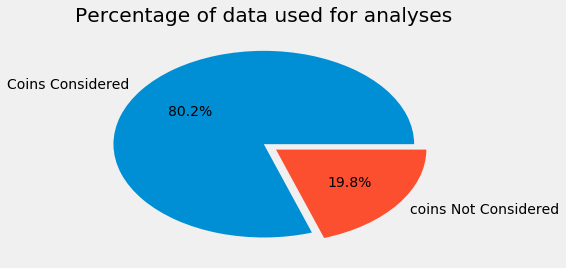

In [160]:
coinsConsidered = 1214
coinsNotConsidered = 300
plt.pie(x = [coinsConsidered,coinsNotConsidered], labels=['Coins Considered','coins Not Considered'], explode = (0.0, 0.1), 
        autopct='%1.1f%%')
plt.title('Percentage of data used for analyses')
plt.show()

In [161]:
def CurrenciesByAttributeGraph(data,title):
    plt.figure(figsize=(12,5))
    plt.title(title)
    plt.plot(data.index,data.values)
    plt.show()

In [162]:
# data = dataset_indexed.groupby(['name', 'year']).sum()['volume'].unstack(level=0).fillna(0)

In [163]:
# plt.figure(figsize=(12,5))
# plt.plot(data.index,data.values)
# plt.legend(data.columns)
# plt.show()

# data.index

In [164]:
# data = dataset_indexed.groupby(['name']).sum().sort_values('market', ascending=False)['market'].head(5)


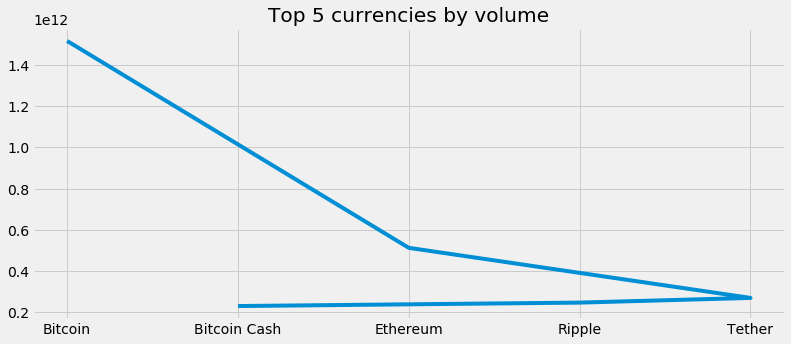

In [165]:
top5currenciesByVolume = topKCurrenciesByAttribute(5,'volume')
CurrenciesByAttributeGraph( top5currenciesByVolume, 'Top 5 currencies by volume')

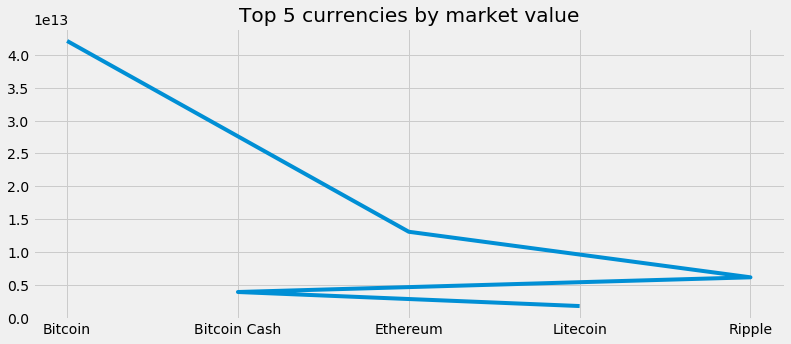

In [166]:
top5currenciesByMarket = topKCurrenciesByAttribute(5,'market')
CurrenciesByAttributeGraph(top5currenciesByMarket, 'Top 5 currencies by market value')

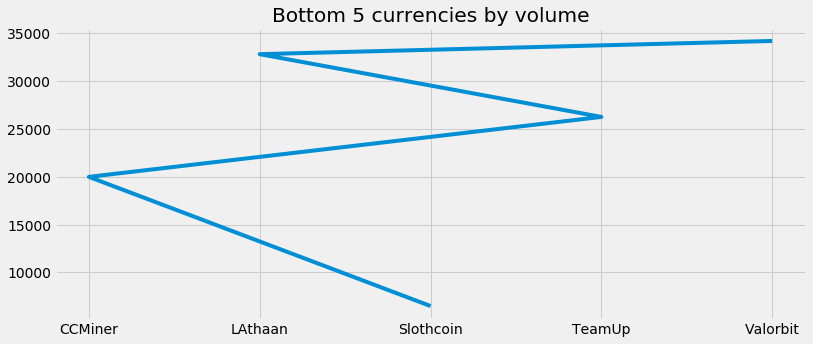

In [167]:
#  low volume means people dont prefer to use these currencies
bottom5currenciesByVolume = bottomKCurrenciesByAttribute(5,'volume')
CurrenciesByAttributeGraph( bottom5currenciesByVolume, 'Bottom 5 currencies by volume')

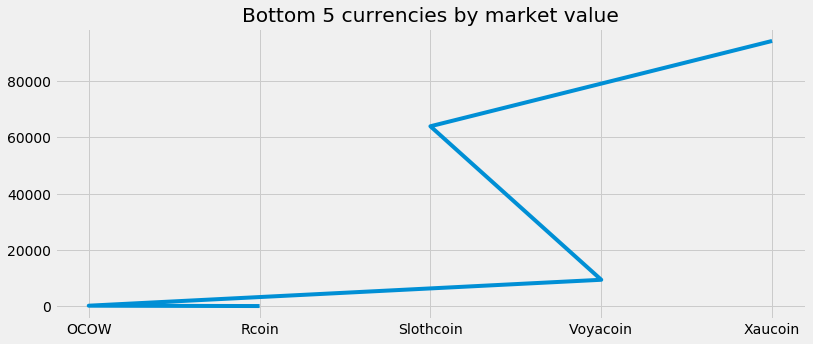

In [168]:
# low market value means low number of comapny shares or low
bottom5currenciesByMarket = bottomKCurrenciesByAttribute(5,'market')
CurrenciesByAttributeGraph(bottom5currenciesByMarket, 'Bottom 5 currencies by market value')

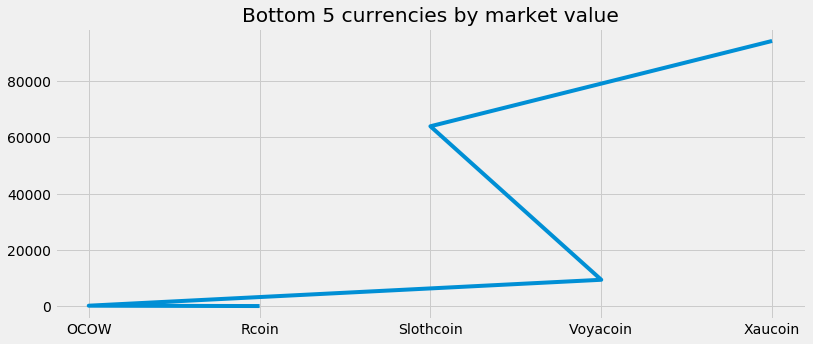

In [169]:
bottom5currenciesByMarket = bottomKCurrenciesByAttribute(5,'market')
# bottom5currenciesByMarket
CurrenciesByAttributeGraph(bottom5currenciesByMarket, 'Bottom 5 currencies by market value')

In [170]:
def yearwiseCurrenciesByAttribute(attribute):
    data = dataset_indexed.groupby(['year','name']).sum().sort_values(attribute, ascending=False)[attribute].unstack(level=1).fillna(0)
    return data

In [171]:
yearwiseDistributionByVolume = yearwiseCurrenciesByAttribute('volume')
yearwiseDistributionByMarket = yearwiseCurrenciesByAttribute('market')

In [172]:
def yearwiseCurrenciesByAttributeGraph(yearwiseDistributionByAttribute, top5currenciesByattribute, title):
    plt.figure(figsize=(12,5))
    plt.style.use('fivethirtyeight')
    plt.title(title)
    for currency in top5currenciesByattribute.index:
        data = yearwiseDistributionByAttribute[currency]
        plt.plot(data.index,data.values)
    plt.legend(top5currenciesByattribute.index)
    plt.show()

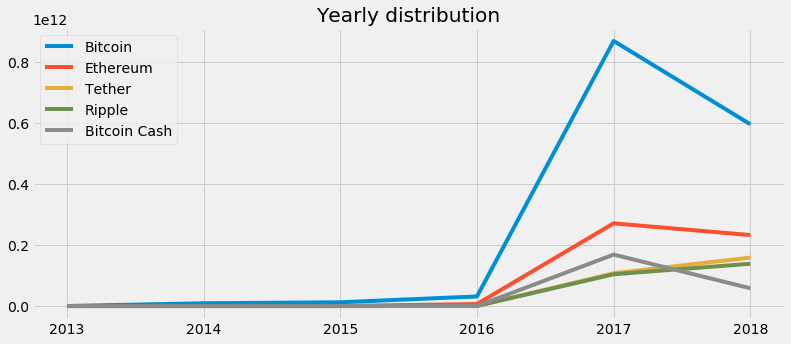

In [173]:
yearwiseCurrenciesByAttributeGraph(yearwiseDistributionByVolume, top5currenciesByVolume, 'Yearly distribution')

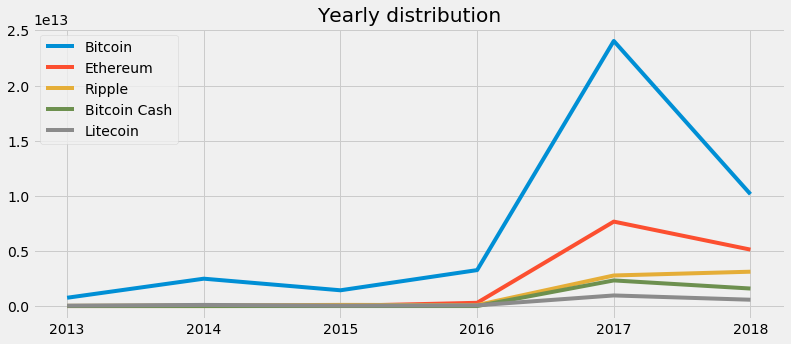

In [174]:
yearwiseCurrenciesByAttributeGraph(yearwiseDistributionByMarket, top5currenciesByMarket, 'Yearly distribution')

 # trying to find dead coins

In [175]:
dataset_name_indexed = dataset.set_index(['name']).sort_index()

In [176]:
dataset_name_indexed.index

Index(['0x', '0x', '0x', '0x', '0x', '0x', '0x', '0x', '0x', '0x',
       ...
       'vTorrent', 'vTorrent', 'vTorrent', 'vTorrent', 'vTorrent', 'vTorrent',
       'vTorrent', 'vTorrent', 'vTorrent', 'vTorrent'],
      dtype='object', name='name', length=702166)

In [177]:
dataset_name_indexed.loc['Litecoin Cash'].shape[0]
# Litecoin Cash

13

In [178]:
coin_name = []
coin_maxDate = []
coin_encountered = []
for coin in dataset_name_indexed.index:
    if coin not in coin_encountered:
        coin_encountered.append(coin)
        if dataset_name_indexed.loc[coin].shape[0] > 15:
            coin_name.append(coin)
            coin_maxDate.append(dataset_name_indexed.loc[coin]['date'].max())

In [179]:
coin_lastDateDf= pd.Series(data = coin_name, index = coin_maxDate)

In [180]:
# coin_lastDateDf.index.
# coin_lastDateDf = pd.to_datetime(coin_lastDateDf.index)

In [181]:
coin_lastDateDf.index[coin_lastDateDf.index < '2018-01-01']

Index([], dtype='object')

In [182]:
#  This mean we have data for all active coins

 # trying to find out that are not doing well

In [183]:
dataset = pd.read_csv('crypto-markets.csv')

In [184]:
dataset['date'] = pd.to_datetime(dataset['date'])
# dataset['date'] = pd.datetime.strptime(dataset['date'], '%Y-%m-%d')
dataset.dtypes

slug                   object
symbol                 object
name                   object
date           datetime64[ns]
ranknow                 int64
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
market                  int64
close_ratio           float64
spread                float64
dtype: object

In [185]:
dataset_date_indexed = dataset.set_index(['date'])

In [186]:
dataset_date_indexed

slug symbol     name  ranknow        open        high  \
date                                                                   
2013-04-28  bitcoin    BTC  Bitcoin        1  135.300000  135.980000   
2013-04-29  bitcoin    BTC  Bitcoin        1  134.440000  147.490000   
2013-04-30  bitcoin    BTC  Bitcoin        1  144.000000  146.930000   
2013-05-01  bitcoin    BTC  Bitcoin        1  139.000000  139.890000   
2013-05-02  bitcoin    BTC  Bitcoin        1  116.380000  125.600000   
2013-05-03  bitcoin    BTC  Bitcoin        1  106.250000  108.130000   
2013-05-04  bitcoin    BTC  Bitcoin        1   98.100000  115.000000   
2013-05-05  bitcoin    BTC  Bitcoin        1  112.900000  118.800000   
2013-05-06  bitcoin    BTC  Bitcoin        1  115.980000  124.660000   
2013-05-07  bitcoin    BTC  Bitcoin        1  112.250000  113.440000   
2013-05-08  bitcoin    BTC  Bitcoin        1  109.600000  115.780000   
2013-05-09  bitcoin    BTC  Bitcoin        1  113.200000  113.460000   
2013-05-10  bitcoin    BTC  Bitcoin        1  112.800000  122.000000   
2013-05-11  bitcoin    BTC  Bitcoin        1  117.700000  118.680000   
2013-05-12  bitcoin    BTC  Bitcoin        1  115.640000  117.450000   
2013-05-13  bitcoin    BTC  Bitcoin        1  114.820000  118.700000   
2013-05-14  bitcoin    BTC  Bitcoin        1  117.980000  119.800000   
2013-05-15  bitcoin    BTC  Bitcoin        1  111.400000  115.810000   
2013-05-16  bitcoin    BTC  Bitcoin        1  114.220000  118.760000   
2013-05-17  bitcoin    BTC  Bitcoin        1  118.210000  125.300000   
2013-05-18  bitcoin    BTC  Bitcoin        1  123.500000  125.250000   
2013-05-19  bitcoin    BTC  Bitcoin        1  123.210000  124.500000   
2013-05-20  bitcoin    BTC  Bitcoin        1  122.500000  123.620000   
2013-05-21  bitcoin    BTC  Bitcoin        1  122.020000  123.000000   
2013-05-22  bitcoin    BTC  Bitcoin        1  122.890000  124.000000   
2013-05-23  bitcoin    BTC  Bitcoin        1  123.800000  126.930000   
2013-05-24  bitcoin    BTC  Bitcoin        1  126.300000  133.850000   
2013-05-25  bitcoin    BTC  Bitcoin        1  133.100000  133.220000   
2013-05-26  bitcoin    BTC  Bitcoin        1  131.990000  136.000000   
2013-05-27  bitcoin    BTC  Bitcoin        1  133.500000  135.470000   
...             ...    ...      ...      ...         ...         ...   
2017-12-02     ocow   OCOW     OCOW     1516    0.004831    0.004926   
2017-12-03     ocow   OCOW     OCOW     1516    0.004810    0.004930   
2017-12-09     ocow   OCOW     OCOW     1516    0.000924    0.000927   
2017-12-10     ocow   OCOW     OCOW     1516    0.000902    0.000902   
2017-12-12     ocow   OCOW     OCOW     1516    0.006042    0.006216   
2017-12-13     ocow   OCOW     OCOW     1516    0.006047    0.006127   
2017-12-14     ocow   OCOW     OCOW     1516    0.005731    0.005972   
2017-12-15     ocow   OCOW     OCOW     1516    0.004479    0.004880   
2017-12-16     ocow   OCOW     OCOW     1516    0.000089    0.004738   
2017-12-17     ocow   OCOW     OCOW     1516    0.000573    0.000741   
2017-12-18     ocow   OCOW     OCOW     1516    0.000191    0.000264   
2017-12-19     ocow   OCOW     OCOW     1516    0.000168    0.000224   
2017-12-20     ocow   OCOW     OCOW     1516    0.000159    0.000735   
2017-12-21     ocow   OCOW     OCOW     1516    0.000165    0.000243   
2017-12-22     ocow   OCOW     OCOW     1516    0.000126    0.000140   
2017-12-23     ocow   OCOW     OCOW     1516    0.000014    0.000031   
2017-12-24     ocow   OCOW     OCOW     1516    0.000015    0.000029   
2017-12-25     ocow   OCOW     OCOW     1516    0.000028    0.000042   
2017-12-26     ocow   OCOW     OCOW     1516    0.000014    0.000016   
2017-12-27     ocow   OCOW     OCOW     1516    0.000016    0.000032   
2017-12-28     ocow   OCOW     OCOW     1516    0.000016    0.000016   
2017-12-29     ocow   OCOW     OCOW     1516    0.000015    0.000030   
2017-12-30     ocow   OCOW     OCOW     1516    0.00001

In [187]:
dataset_name_indexed = dataset.set_index(['name'])

In [188]:
dataset_name_indexed.loc['Bitcoin']

slug symbol       date  ranknow      open      high       low  \
name                                                                        
Bitcoin  bitcoin    BTC 2013-04-28        1    135.30    135.98    132.10   
Bitcoin  bitcoin    BTC 2013-04-29        1    134.44    147.49    134.00   
Bitcoin  bitcoin    BTC 2013-04-30        1    144.00    146.93    134.05   
Bitcoin  bitcoin    BTC 2013-05-01        1    139.00    139.89    107.72   
Bitcoin  bitcoin    BTC 2013-05-02        1    116.38    125.60     92.28   
Bitcoin  bitcoin    BTC 2013-05-03        1    106.25    108.13     79.10   
Bitcoin  bitcoin    BTC 2013-05-04        1     98.10    115.00     92.50   
Bitcoin  bitcoin    BTC 2013-05-05        1    112.90    118.80    107.14   
Bitcoin  bitcoin    BTC 2013-05-06        1    115.98    124.66    106.64   
Bitcoin  bitcoin    BTC 2013-05-07        1    112.25    113.44     97.70   
Bitcoin  bitcoin    BTC 2013-05-08        1    109.60    115.78    109.60   
Bitcoin  bitcoin    BTC 2013-05-09        1    113.20    113.46    109.26   
Bitcoin  bitcoin    BTC 2013-05-10        1    112.80    122.00    111.55   
Bitcoin  bitcoin    BTC 2013-05-11        1    117.70    118.68    113.01   
Bitcoin  bitcoin    BTC 2013-05-12        1    115.64    117.45    113.44   
Bitcoin  bitcoin    BTC 2013-05-13        1    114.82    118.70    114.50   
Bitcoin  bitcoin    BTC 2013-05-14        1    117.98    119.80    110.25   
Bitcoin  bitcoin    BTC 2013-05-15        1    111.40    115.81    103.50   
Bitcoin  bitcoin    BTC 2013-05-16        1    114.22    118.76    112.20   
Bitcoin  bitcoin    BTC 2013-05-17        1    118.21    125.30    116.57   
Bitcoin  bitcoin    BTC 2013-05-18        1    123.50    125.25    122.30   
Bitcoin  bitcoin    BTC 2013-05-19        1    123.21    124.50    119.57   
Bitcoin  bitcoin    BTC 2013-05-20        1    122.50    123.62    120.12   
Bitcoin  bitcoin    BTC 2013-05-21        1    122.02    123.00    121.21   
Bitcoin  bitcoin    BTC 2013-05-22        1    122.89    124.00    122.00   
Bitcoin  bitcoin    BTC 2013-05-23        1    123.80    126.93    123.10   
Bitcoin  bitcoin    BTC 2013-05-24        1    126.30    133.85    125.72   
Bitcoin  bitcoin    BTC 2013-05-25        1    133.10    133.22    128.90   
Bitcoin  bitcoin    BTC 2013-05-26        1    131.99    136.00    130.62   
Bitcoin  bitcoin    BTC 2013-05-27        1    133.50    135.47    124.70   
...          ...    ...        ...      ...       ...       ...       ...   
Bitcoin  bitcoin    BTC 2018-01-23        1  10944.50  11377.60  10129.70   
Bitcoin  bitcoin    BTC 2018-01-24        1  10903.40  11501.40  10639.80   
Bitcoin  bitcoin    BTC 2018-01-25        1  11421.70  11785.70  11057.40   
Bitcoin  bitcoin    BTC 2018-01-26        1  11256.00  11656.70  10470.30   
Bitcoin  bitcoin    BTC 2018-01-27        1  11174.90  11614.90  10989.20   
Bitcoin  bitcoin    BTC 2018-01-28        1  11475.30  12040.30  11475.30   
Bitcoin  bitcoin    BTC 2018-01-29        1  11755.50  11875.60  11179.20   
Bitcoin  bitcoin    BTC 2018-01-30        1  11306.80  11307.20  10036.20   
Bitcoin  bitcoin    BTC 2018-01-31        1  10108.20  10381.60   9777.42   
Bitcoin  bitcoin    BTC 2018-02-01        1  10237.30  10288.80   8812.28   
Bitcoin  bitcoin    BTC 2018-02-02        1   9142.28   9142.28   7796.49   
Bitcoin  bitcoin    BTC 2018-02-03        1   8852.12   9430.75   8251.63   
Bitcoin  bitcoin    BTC 2018-02-04        1   9175.70   9334.87   8031.22   
Bitcoin  bitcoin    BTC 2018-02-05        1   8270.54   8364.84   6756.68   
Bitcoin  bitcoin    BTC 2018-02-06        1   7051.75   7850.70   6048.26   
Bitcoin  bitcoin    BTC 2018-02-07        1   7755.49   8509.11   7236.79   
Bitcoin  bitcoin    BTC 2018-02-08        1   7637.86   8558.77   7637.86   
Bitcoin  bitcoin    BTC 2018-02-09        1   8271.84   8736.98   7884.71   
Bitcoin  bitcoin    BTC 2018-02-10        1   8720.08   9122.55   8295.47   
Bitcoin 

In [189]:
dataset_date_indexed.shape

(702166, 12)

In [190]:
dat.max()

1.0

In [191]:
MinMaxNormalizeData.min()

date      2013-04-28 00:00:00
name                       0x
open                        0
high                        0
low                         0
close                       0
market                      0
volume                      0
dtype: object

In [192]:
MinMaxNormalizeData.max()

date      2018-02-21 00:00:00
name                 vTorrent
open                        1
high                        1
low                         1
close                       1
market                      1
volume                      1
dtype: object

In [193]:
# datesDF = pd.DataFrame(pd.to_datetime(dataset['date']),columns = ['date'])
# MinMaxNormalizeData=pd.concat([ datesDF, MinMaxNormalizeData ], axis=1)

In [194]:
minMaxIndexedDataset = MinMaxNormalizeData.set_index(['date'])

In [195]:
minMaxIndexedDataset

name          open          high           low         close  \
date                                                                          
2013-04-28  Bitcoin  5.886729e-05  4.647141e-05  6.505498e-05  5.833341e-05   
2013-04-29  Bitcoin  5.849312e-05  5.040498e-05  6.599067e-05  6.282327e-05   
2013-04-30  Bitcoin  6.265255e-05  5.021359e-05  6.601530e-05  6.041534e-05   
2013-05-01  Bitcoin  6.047712e-05  4.780766e-05  5.304862e-05  5.084886e-05   
2013-05-02  Bitcoin  5.063544e-05  4.292403e-05  4.544492e-05  4.572877e-05   
2013-05-03  Bitcoin  4.622801e-05  3.695362e-05  3.895420e-05  4.248633e-05   
2013-05-04  Bitcoin  4.268205e-05  3.930146e-05  4.555326e-05  4.889731e-05   
2013-05-05  Bitcoin  4.912134e-05  4.060012e-05  5.276299e-05  5.037944e-05   
2013-05-06  Bitcoin  5.046141e-05  4.260278e-05  5.251676e-05  4.881038e-05   
2013-05-07  Bitcoin  4.883853e-05  3.876833e-05  4.811409e-05  4.846267e-05   
2013-05-08  Bitcoin  4.768555e-05  3.956803e-05  5.397446e-05  4.936238e-05   
2013-05-09  Bitcoin  4.925187e-05  3.877516e-05  5.380702e-05  4.897120e-05   
2013-05-10  Bitcoin  4.907783e-05  4.169372e-05  5.493477e-05  5.094013e-05   
2013-05-11  Bitcoin  5.120976e-05  4.055911e-05  5.565378e-05  5.008823e-05   
2013-05-12  Bitcoin  5.031348e-05  4.013875e-05  5.586554e-05  4.998392e-05   
2013-05-13  Bitcoin  4.995671e-05  4.056594e-05  5.638755e-05  5.127915e-05   
2013-05-14  Bitcoin  5.133158e-05  4.094187e-05  5.429456e-05  4.846267e-05   
2013-05-15  Bitcoin  4.846871e-05  3.957828e-05  5.097041e-05  4.964490e-05   
2013-05-16  Bitcoin  4.969566e-05  4.058645e-05  5.525488e-05  5.161818e-05   
2013-05-17  Bitcoin  5.143165e-05  4.282150e-05  5.740696e-05  5.346975e-05   
2013-05-18  Bitcoin  5.373327e-05  4.280442e-05  6.022880e-05  5.367838e-05   
2013-05-19  Bitcoin  5.360709e-05  4.254810e-05  5.888436e-05  5.302207e-05   
2013-05-20  Bitcoin  5.329818e-05  4.224736e-05  5.915522e-05  5.302642e-05   
2013-05-21  Bitcoin  5.308934e-05  4.203547e-05  5.969201e-05  5.340890e-05   
2013-05-22  Bitcoin  5.346786e-05  4.237723e-05  6.008106e-05  5.384789e-05   
2013-05-23  Bitcoin  5.386379e-05  4.337856e-05  6.062277e-05  5.506924e-05   
2013-05-24  Bitcoin  5.495151e-05  4.574348e-05  6.191304e-05  5.789442e-05   
2013-05-25  Bitcoin  5.791010e-05  4.552818e-05  6.347909e-05  5.736415e-05   
2013-05-26  Bitcoin  5.742716e-05  4.647825e-05  6.432613e-05  5.801612e-05   
2013-05-27  Bitcoin  5.808414e-05  4.629712e-05  6.141072e-05  5.639490e-05   
...             ...           ...           ...           ...           ...   
2017-12-02     OCOW  2.101905e-09  1.683468e-09  2.329372e-09  2.088458e-09   
2017-12-03     OCOW  2.092768e-09  1.684835e-09  2.353011e-09  2.129315e-09   
2017-12-09     OCOW  4.020195e-10  3.168028e-10  4.003762e-10  3.907438e-10   
2017-12-10     OCOW  3.924475e-10  3.082590e-10  3.910194e-10  3.577110e-10   
2017-12-12     OCOW  2.628796e-09  2.124328e-09  2.940032e-09  2.626112e-09   
2017-12-13     OCOW  2.630971e-09  2.093912e-09  2.746985e-09  2.499196e-09   
2017-12-14     OCOW  2.493483e-09  2.040941e-09  2.188526e-09  1.943722e-09   
2017-12-15     OCOW  1.948754e-09  1.667748e-09  3.910194e-10  3.451064e-10   
2017-12-16     OCOW  3.872167e-11  1.619219e-09  4.382963e-11  2.516582e-10   
2017-12-17     OCOW  2.493039e-10  2.532370e-10  7.534756e-11  8.301677e-11   
2017-12-18     OCOW  8.310056e-11  9.022139e-11  4.629196e-11  7.301998e-11   
2017-12-19     OCOW  7.309356e-11  7.655131e-11  5.121664e-11  6.910820e-11   
2017-12-20     OCOW  6.917777e-11  2.511865e-10  2.462339e-11  7.128141e-11   
2017-12-21     OCOW  7.178830e-11  8.304460e-11  6.008106e-11  5.433035e-11   
2017-12-22     OCOW  5.481990e-11  4.784416e-11  6.402080e-12  6.084999e-12   
2017-12-23     OCOW  6.090133e-12  1.059321e-11  6.894548e-12  6.084999e-12   
2017-12-24     OCOW  6.525220e-12  9.909709e-12  6.402080e-12  1.217000e-11   
2017-12-25     OCOW  1.218135e-11  1.435248e-11  6.402080e-12  6.

In [196]:
# Top performers
# dataset = pd.read_csv('crypto-markets.csv')
# dataset['date'] = pd.to_datetime(dataset['date'])
MinMaxNormalizeData.dtypes

date      datetime64[ns]
name              object
open             float64
high             float64
low              float64
close            float64
market           float64
volume           float64
dtype: object

In [197]:
nameSorted = MinMaxNormalizeData.set_index(['name'])

In [198]:
marketData = nameSorted.groupby('name')['market'].sum()
marketDataDF = pd.DataFrame(marketData,columns = ['market'])
marketDataDF = marketDataDF[marketDataDF['market'] != 0]
worstCurrencyPerformers = marketDataDF.sort_values(by='market').head(5).index
topCurrencyPerformers = marketDataDF.sort_values(by='market', ascending = False).head(5).index

In [199]:
# marketDataDF.sort_values(by='market')


In [200]:
worstCurrencyPerformersData = MinMaxNormalizeData[MinMaxNormalizeData['name'].isin(worstCurrencyPerformers)]

In [201]:
topCurrencyPerformersData = MinMaxNormalizeData[MinMaxNormalizeData['name'].isin(topCurrencyPerformers)]

In [208]:
# temp_Date = worstCurrencyPerformersData.date
# worstCurrencyPerformersData = worstCurrencyPerformersData['date'].drop
worstCurrencyPerformersData.head()

date       name          open          high           low  \
650828 2014-04-28  Slothcoin  1.739261e-12  1.365914e-12  1.969871e-12   
650829 2018-02-13  Slothcoin  2.174348e-12  2.391169e-12  2.462338e-12   
650830 2018-02-14  Slothcoin  2.609435e-12  1.196022e-11  2.954806e-12   
650831 2018-02-15  Slothcoin  1.348661e-11  1.059321e-11  2.462338e-12   
650832 2018-02-16  Slothcoin  8.700656e-12  1.469423e-11  3.447274e-12   

               close        market        volume  
650828  1.738571e-12  1.958386e-07  0.000000e+00  
650829  2.607857e-12  0.000000e+00  1.610677e-08  
650830  1.347393e-11  0.000000e+00  3.674358e-08  
650831  8.692855e-12  0.000000e+00  3.108104e-08  
650832  1.086607e-11  0.000000e+00  2.290182e-08

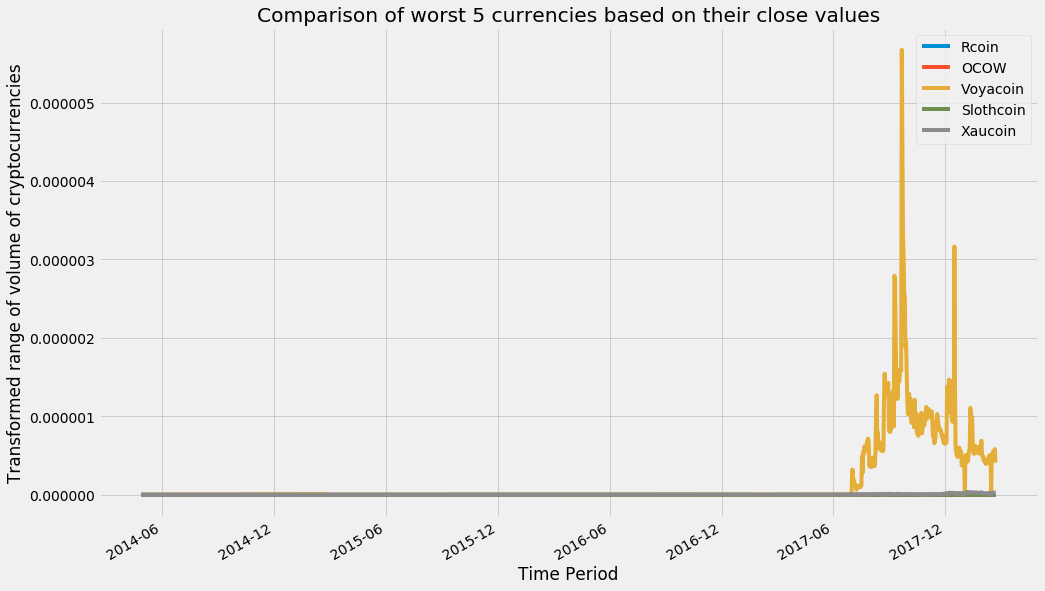

In [205]:
worst5CurrenciesPricePerUnit = worstCurrencyPerformersData.groupby(['date','name'])['close'].mean().unstack()
# worst5CurrenciesPricePerUnit
worst5CurrenciesPricePerUnit_fillNA = pd.DataFrame()
for coin in worstCurrencyPerformers:
    worst5CurrenciesPricePerUnit_fillNA[coin] = worst5CurrenciesPricePerUnit[coin].fillna(worst5CurrenciesPricePerUnit['OCOW'].mean())
worst5CurrenciesPricePerUnit_fillNA.plot(legend=True,figsize=(15, 10), title='Comparison of worst 5 currencies based on their close values')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

In [207]:
worst5CurrenciesPricePerUnit_fillNA.head()

Rcoin          OCOW      Voyacoin     Slothcoin  \
date                                                                 
2014-04-28  7.469492e-10  7.469492e-10  7.469492e-10  1.738571e-12   
2015-02-28  7.469492e-10  7.469492e-10  7.857907e-09  7.469492e-10   
2015-03-01  7.469492e-10  7.469492e-10  2.629154e-09  7.469492e-10   
2015-03-02  7.469492e-10  7.469492e-10  1.865487e-09  7.469492e-10   
2015-03-03  7.469492e-10  7.469492e-10  6.337092e-10  7.469492e-10   

                 Xaucoin  
date                      
2014-04-28  7.469492e-10  
2015-02-28  7.469492e-10  
2015-03-01  7.469492e-10  
2015-03-02  7.469492e-10  
2015-03-03  7.469492e-10

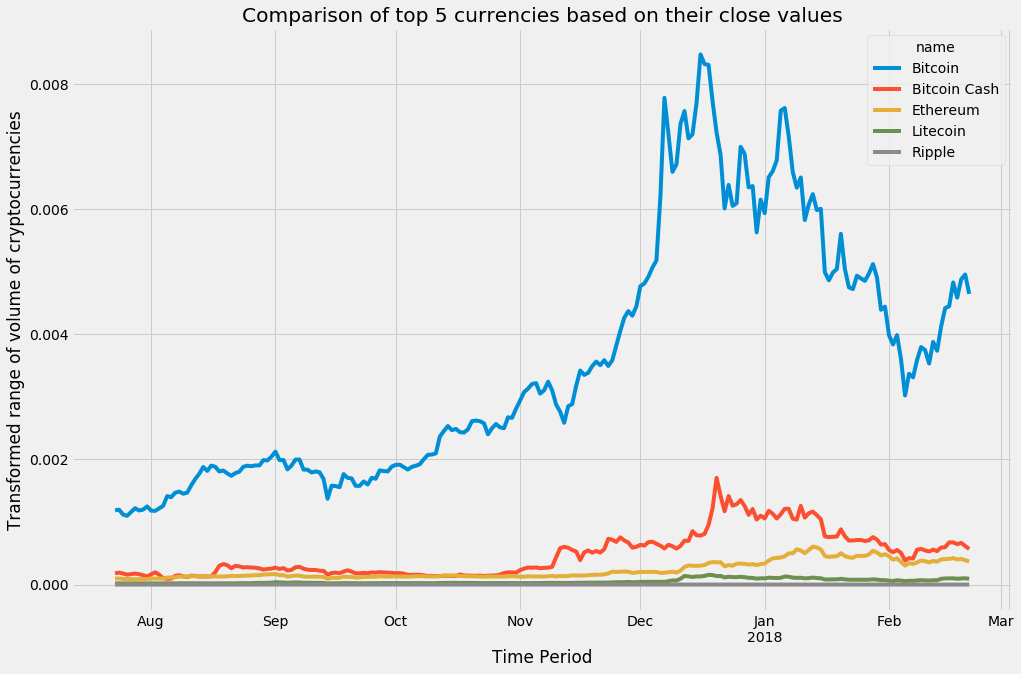

In [209]:
plt.style.use('fivethirtyeight')
top5CurrenciesPricePerUnit = topCurrencyPerformersData.groupby(['date','name'])['close'].mean().unstack()
top5CurrenciesPricePerUnit_dropNA = top5CurrenciesPricePerUnit.dropna(axis=0, how='any')
top5CurrenciesPricePerUnit_dropNA.plot(legend=True,figsize=(15, 10), 
                                        title='Comparison of top 5 currencies based on their close values')
plt.ylabel('Transformed range of volume of cryptocurrencies')
plt.xlabel('Time Period')
plt.show()

In [210]:
nameSorted.loc['Bitcoin'].head()

date      open      high       low     close    market  volume
name                                                                        
Bitcoin 2013-04-28  0.000059  0.000046  0.000065  0.000058  0.004601     0.0
Bitcoin 2013-04-29  0.000058  0.000050  0.000066  0.000063  0.004572     0.0
Bitcoin 2013-04-30  0.000063  0.000050  0.000066  0.000060  0.004899     0.0
Bitcoin 2013-05-01  0.000060  0.000048  0.000053  0.000051  0.004731     0.0
Bitcoin 2013-05-02  0.000051  0.000043  0.000045  0.000046  0.003962     0.0

#  Weekly and monthly grouping of top 5 coins

In [211]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [212]:
# Load data
dataset = pd.read_csv('crypto-markets.csv')
dataset.head()

slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   

    close  volume      market  close_ratio  spread  
0  134.21       0  1500520000       0.5438    3.88  
1  144.54       0  1491160000       0.7813   13.49  
2  139.00       0  1597780000       0.3843   12.88  
3  116.99       0  1542820000       0.2882   32.17  
4  105.21       0  1292190000       0.3881   33.32

In [213]:
dataset['date'] = pd.to_datetime(dataset['date'])
data= dataset.set_index(['date'])

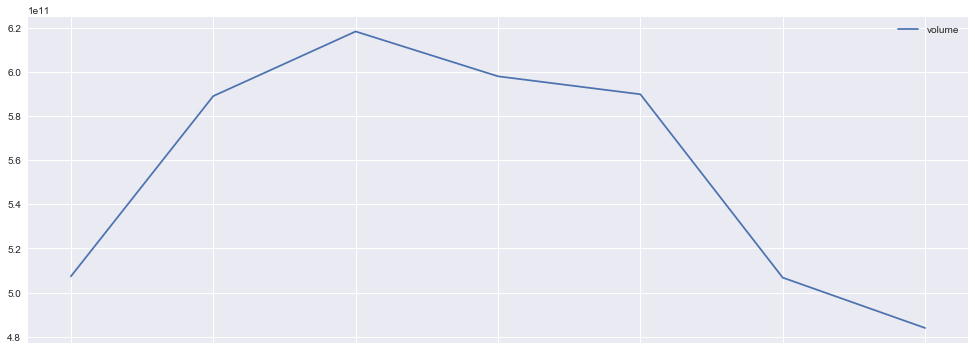

In [214]:
by_weekday = pd.DataFrame(data.groupby(data.index.dayofweek).sum()['volume'])
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.index = days
# ax.get_xaxis().set_visible(true)

by_weekday.plot(use_index = True, legend = True)

# plt.xlabel = days
# plt.show()

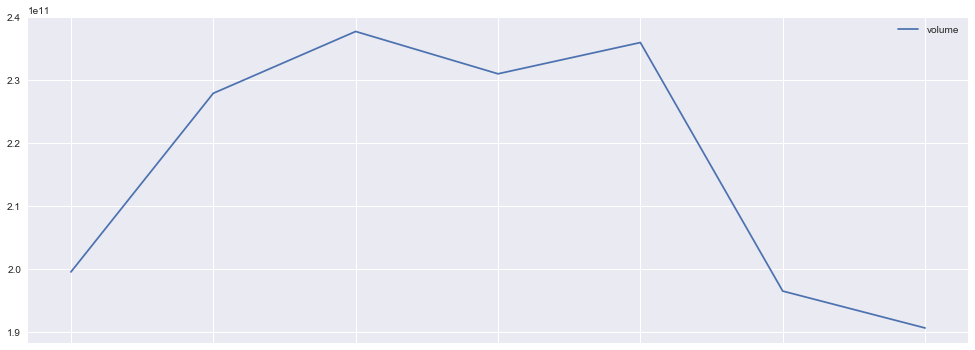

In [215]:
name_date_data = dataset.set_index(['name','date'])
# name_date_data.loc['Bitcoin']
by_weekday = pd.DataFrame(name_date_data.loc['Bitcoin'].
                          groupby(name_date_data.loc['Bitcoin'].index.dayofweek).sum()['volume'])
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.index = days
# ax.get_xaxis().set_visible(true)

by_weekday.plot(use_index = True, legend = True)

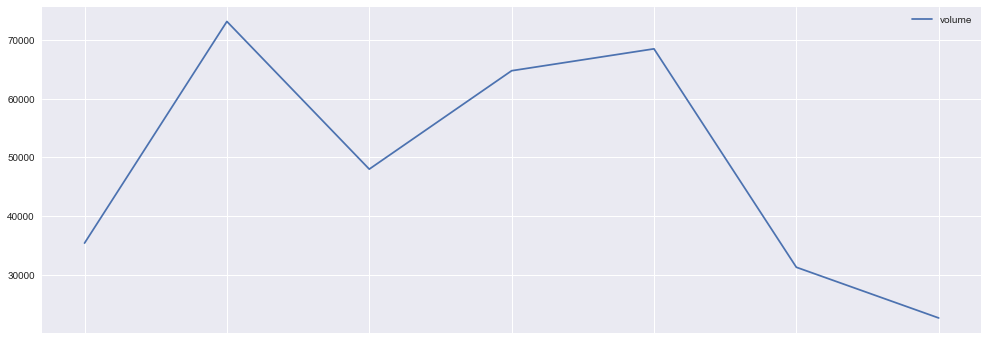

In [216]:
by_weekday = pd.DataFrame(name_date_data.loc['Rcoin'].
                          groupby(name_date_data.loc['Rcoin'].index.dayofweek).sum()['volume'])
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.index = days
# ax.get_xaxis().set_visible(true)

by_weekday.plot(use_index = True, legend = True)

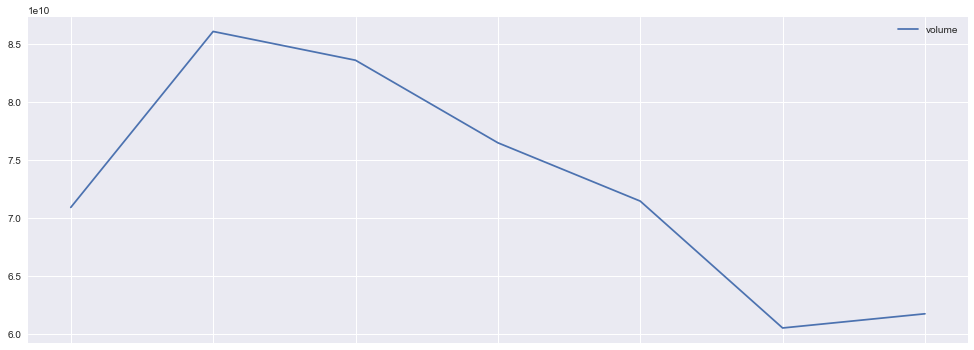

In [217]:
by_weekday = pd.DataFrame(name_date_data.loc['Ethereum'].
                          groupby(name_date_data.loc['Ethereum'].index.dayofweek).sum()['volume'])
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.index = days
# ax.get_xaxis().set_visible(true)

by_weekday.plot(use_index = True, legend = True)

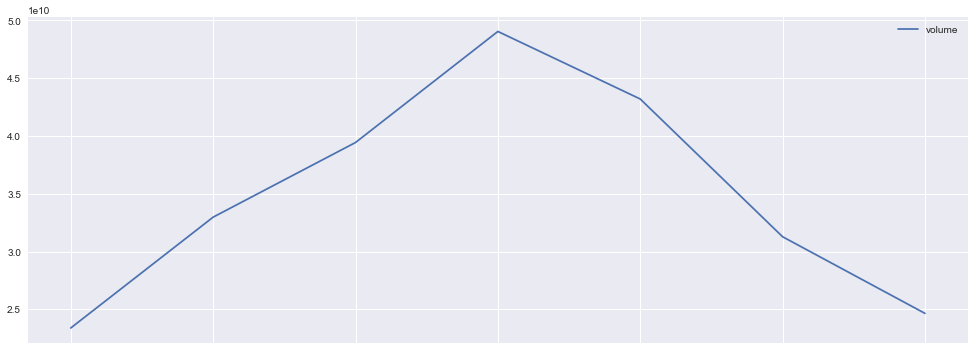

In [218]:
by_weekday = pd.DataFrame(name_date_data.loc['Ripple'].
                          groupby(name_date_data.loc['Ripple'].index.dayofweek).sum()['volume'])
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.index = days
# ax.get_xaxis().set_visible(true)

by_weekday.plot(use_index = True, legend = True)

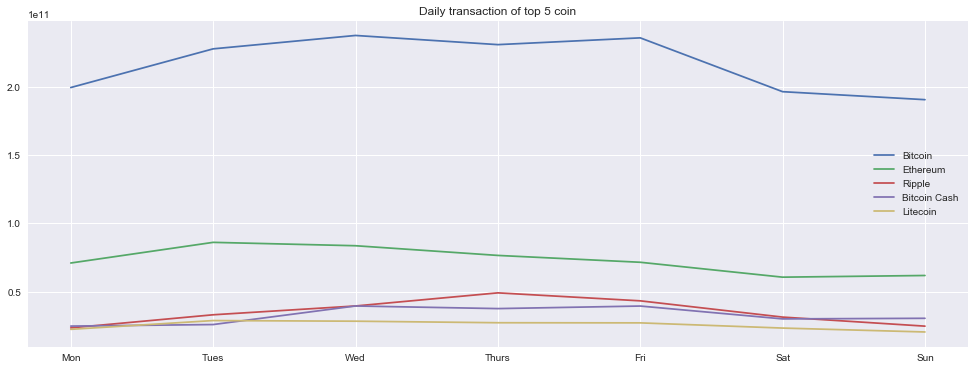

In [219]:
topMarketValuecoins = ['Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Litecoin']
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
topMarketValuecoinsDf = pd.DataFrame()
for coin in topMarketValuecoins:
    by_weekday = pd.DataFrame(name_date_data.loc[coin].
                          groupby(name_date_data.loc[coin].index.dayofweek).sum()['volume'])
#     by_weekday.index = days
    # ax.get_xaxis().set_visible(true)
    topMarketValuecoinsDf[coin] = by_weekday
# topMarketValuecoinsDf.index = days/
plt.xticks(topMarketValuecoinsDf.index,days)
plt.title('Daily transaction of top 5 coin')
graph = plt.plot(topMarketValuecoinsDf)
plt.legend(graph, topMarketValuecoinsDf.columns)
# topMarketValuecoinsDf.plot(use_index = True, legend = True, figsize=(10,15), 
#                            title = 'Daily volume transactions of top 5 coins')

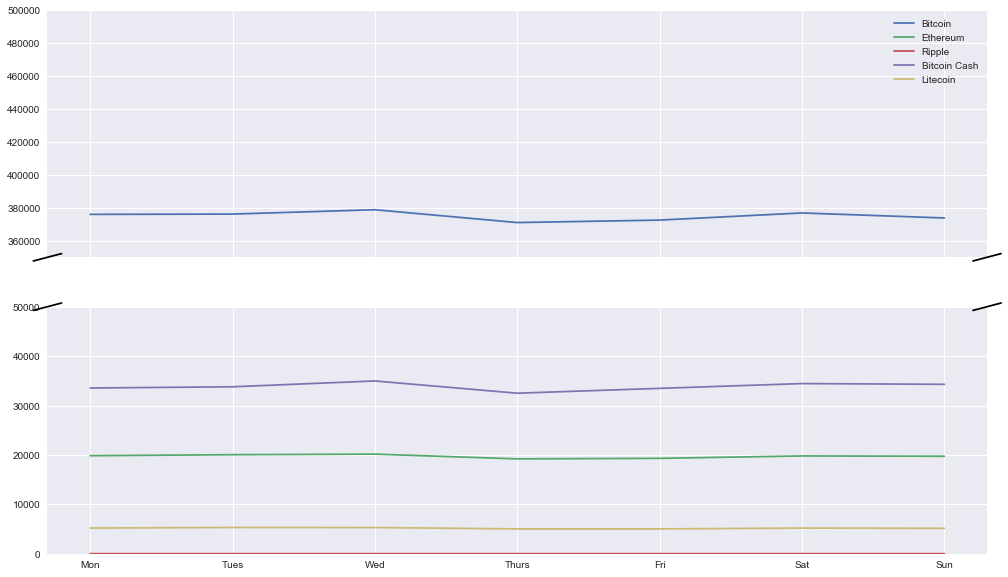

In [220]:
topMarketValuecoins = ['Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Litecoin']
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
topMarketValuecoinsDf = pd.DataFrame()
for coin in topMarketValuecoins:
    by_weekday = pd.DataFrame(name_date_data.loc[coin].
                          groupby(name_date_data.loc[coin].index.dayofweek).sum()['close'])
#     by_weekday.index = days
    # ax.get_xaxis().set_visible(true)
    topMarketValuecoinsDf[coin] = by_weekday
# topMarketValuecoinsDf.index = days/
# plt.xticks(topMarketValuecoinsDf.index,days)
# plt.title('Monthly transaction of top 5 coin')
# graph = plt.plot(topMarketValuecoinsDf)
# plt.legend(graph, topMarketValuecoinsDf.columns)
# topMarketValuecoinsDf.plot(use_index = True, legend = True, figsize=(10,15), 
#                            title = 'Daily volume transactions of top 5 coins')


fig, (ax, ax2) = plt.subplots(2,1, sharex = True, figsize= (15,10))
topMarketValuecoinsDf.index = range(0,7,1)
upperGraph = ax.plot(topMarketValuecoinsDf.sort_index())
ax2.plot(topMarketValuecoinsDf.sort_index())
ax.legend(upperGraph, topMarketValuecoinsDf.columns)
ax.set_ylim(350000, 500000) # To draw bitcoin
ax2.set_ylim(0,50000) # to draw all other coins

# hid the spins between two subplots
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(labeltop='off')
# ax.title('Monthly transaction of top 5 coin')
ax2.xaxis.tick_bottom()
plt.xticks(topMarketValuecoinsDf.index,days)

# align ticks of both subplots
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        
ax.plot((1-d, 1+d), (-d, +d), **kwargs) 
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)  
plt.show()

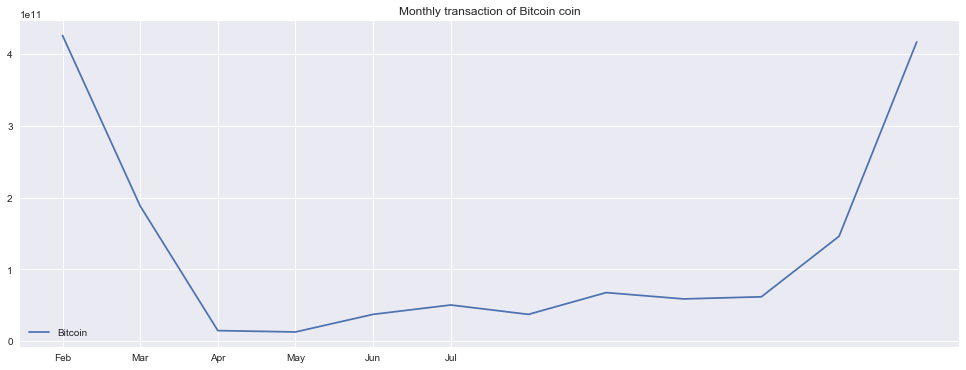

In [221]:
import matplotlib.pyplot as plt
by_month = pd.DataFrame(name_date_data.loc['Bitcoin'].
                          groupby(name_date_data.loc['Bitcoin'].index.month).sum()['volume'])
# days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# by_month.index = (0,12,1)
# ax.get_xaxis().set_visible(true)
plt.xticks(topMarketValuecoinsDf.index,month)
plt.title('Monthly transaction of Bitcoin coin')
graph = plt.plot(by_month)
plt.legend(graph, topMarketValuecoinsDf.columns)
# by_weekday.plot(use_index = True, legend = True)

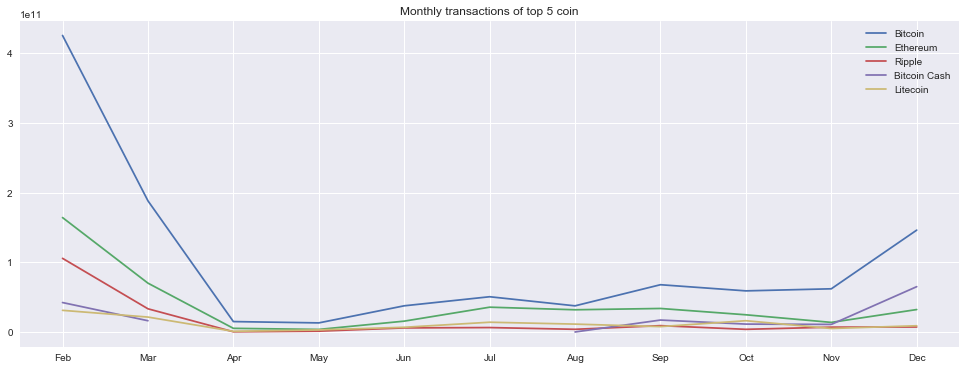

In [222]:
topMarketValuecoins = ['Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Litecoin']
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
topMarketValuecoinsDf = pd.DataFrame()
for coin in topMarketValuecoins:
    by_weekday = pd.DataFrame(name_date_data.loc[coin].
                          groupby(name_date_data.loc[coin].index.month).sum()['volume'])
    topMarketValuecoinsDf[coin] = by_weekday
plt.xticks(topMarketValuecoinsDf.index,month)
plt.title('Monthly transactions of top 5 coin')
graph = plt.plot(topMarketValuecoinsDf)
plt.legend(graph, topMarketValuecoinsDf.columns)
# topMarketValuecoinsDf.index = month
# topMarketValuecoinsDf.plot(use_index = True, legend = True, figsize=(10,15), 
#                            title = 'Monthly volume transactions of top 5 coins')

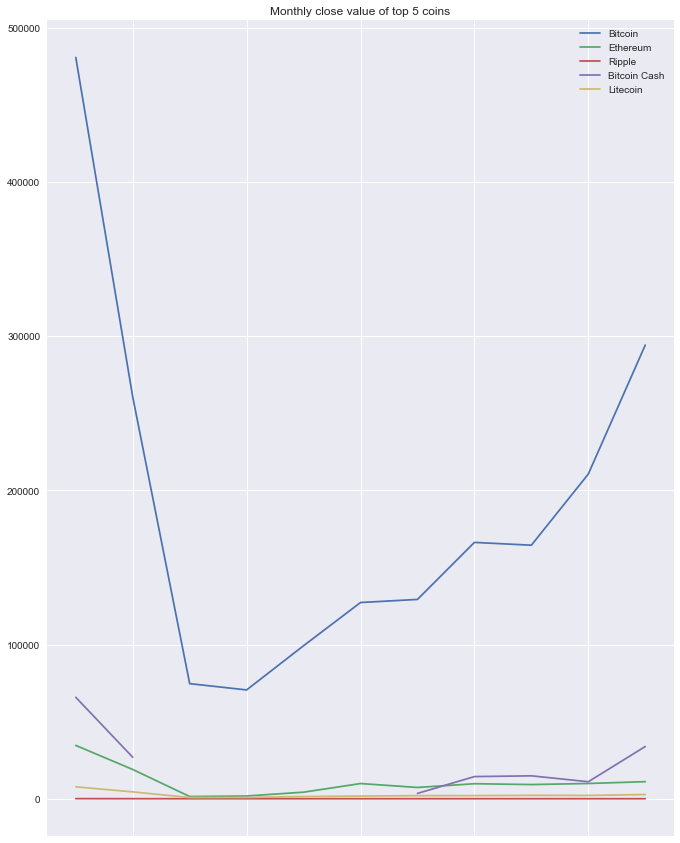

In [223]:
topMarketValuecoins = ['Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Litecoin']
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
topMarketValuecoinsDf = pd.DataFrame()
for coin in topMarketValuecoins:
    by_weekday = pd.DataFrame(name_date_data.loc[coin].
                          groupby(name_date_data.loc[coin].index.month).sum()['close'])
#     by_weekday.index = days
    # ax.get_xaxis().set_visible(true)
    topMarketValuecoinsDf[coin] = by_weekday
topMarketValuecoinsDf.index = month
topMarketValuecoinsDf.plot(use_index = True, legend = True, figsize=(10,15), 
                           title = 'Monthly close value of top 5 coins')

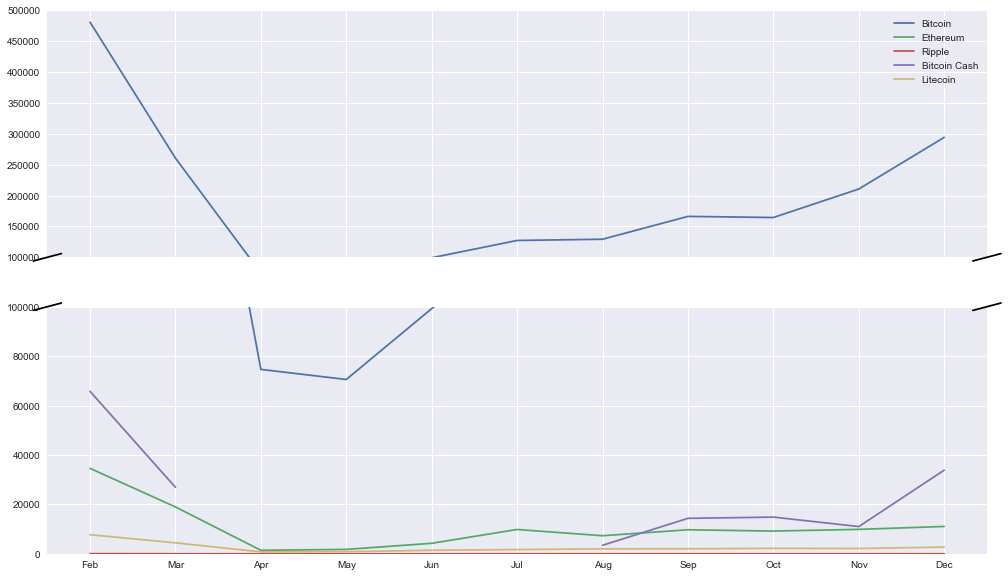

In [224]:
import matplotlib.pyplot as plt
fig, (ax, ax2) = plt.subplots(2,1, sharex = True, figsize= (15,10))
topMarketValuecoinsDf.index = range(0,12,1)
upperGraph = ax.plot(topMarketValuecoinsDf.sort_index())
ax2.plot(topMarketValuecoinsDf.sort_index())
ax.legend(upperGraph, topMarketValuecoinsDf.columns)
ax.set_ylim(100000, 500000) # To draw bitcoin
ax2.set_ylim(0,100000) # to draw all other coins

# hid the spins between two subplots
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(labeltop='off')
ax2.xaxis.tick_bottom()
plt.xticks(topMarketValuecoinsDf.index,month)

# align ticks of both subplots
d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        
ax.plot((1-d, 1+d), (-d, +d), **kwargs) 
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)  
plt.show()

#  ARIMA Time Series 

In [228]:
import warnings
import itertools
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

In [227]:
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
dataset = pd.read_csv('crypto-markets.csv')
dataset['date'] = pd.to_datetime(dataset['date'])
# dataset['date'] = pd.datetime.strptime(dataset['date'], '%Y-%m-%d')
dataset.dtypes
dataset.head()

slug symbol     name       date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin 2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin 2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin 2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin 2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin 2013-05-02        1  116.38  125.60   92.28   

    close  volume      market  close_ratio  spread  
0  134.21       0  1500520000       0.5438    3.88  
1  144.54       0  1491160000       0.7813   13.49  
2  139.00       0  1597780000       0.3843   12.88  
3  116.99       0  1542820000       0.2882   32.17  
4  105.21       0  1292190000       0.3881   33.32

In [229]:
datasetBitcoin = dataset.loc[dataset['name'] == 'Bitcoin']

In [230]:
datasetBitcoinIndexedFull = datasetBitcoin.set_index('date').sort_index()

In [231]:
datasetBitcoinIndexed = datasetBitcoinIndexedFull['2017':]

In [232]:
datasetBitcoinIndexed.head()

slug symbol     name  ranknow     open     high      low  \
date                                                                      
2017-01-01  bitcoin    BTC  Bitcoin        1   963.66  1003.08   958.70   
2017-01-02  bitcoin    BTC  Bitcoin        1   998.62  1031.39   996.70   
2017-01-03  bitcoin    BTC  Bitcoin        1  1021.60  1044.08  1021.60   
2017-01-04  bitcoin    BTC  Bitcoin        1  1044.40  1159.42  1044.40   
2017-01-05  bitcoin    BTC  Bitcoin        1  1156.73  1191.10   910.42   

              close     volume       market  close_ratio  spread  
date                                                              
2017-01-01   998.33  147775000  15491200000       0.8930   44.38  
2017-01-02  1021.75  222185000  16055100000       0.7221   34.69  
2017-01-03  1043.84  185168000  16426600000       0.9893   22.48  
2017-01-04  1154.73  344946000  16795400000       0.9592  115.02  
2017-01-05  1013.38  510199000  18604000000       0.3668  280.68

In [234]:
marketColList = [col for col in datasetBitcoinIndexed.columns if col != 'market']
datasetBitcoinIndexedMarket = datasetBitcoinIndexed.drop(marketColList, axis = 1)
closeColList = [col for col in datasetBitcoinIndexed.columns if col != 'close']
# datasetBitcoinIndexedClose = datasetBitcoinIndexedFull.drop(closeColList, axis = 1)
datasetBitcoinIndexedClose = datasetBitcoinIndexed.drop(closeColList, axis = 1)

In [235]:
# datasetBitcoinIndexedMarket.head()
datasetBitcoinIndexedClose.head()

close
date               
2017-01-01   998.33
2017-01-02  1021.75
2017-01-03  1043.84
2017-01-04  1154.73
2017-01-05  1013.38

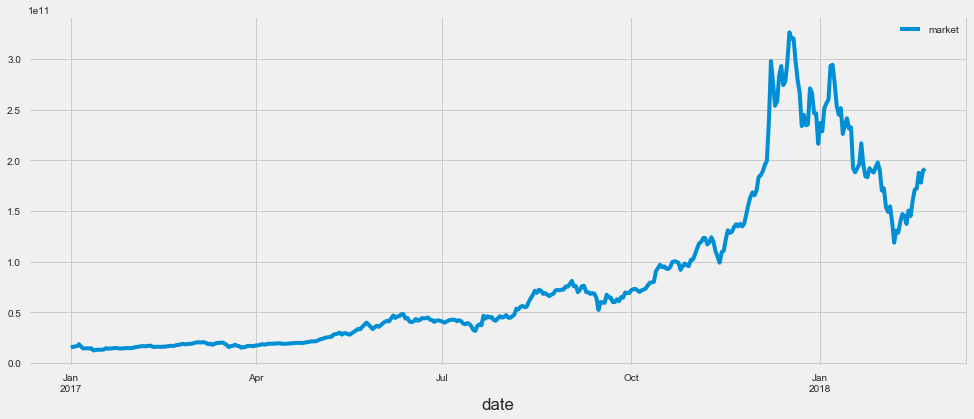

In [236]:
# y = datasetBitcoinIndexedMarket.values
datasetBitcoinIndexedMarket.plot(figsize=(15, 6))
plt.show()
# datasetBitcoinIndexedMarket.values

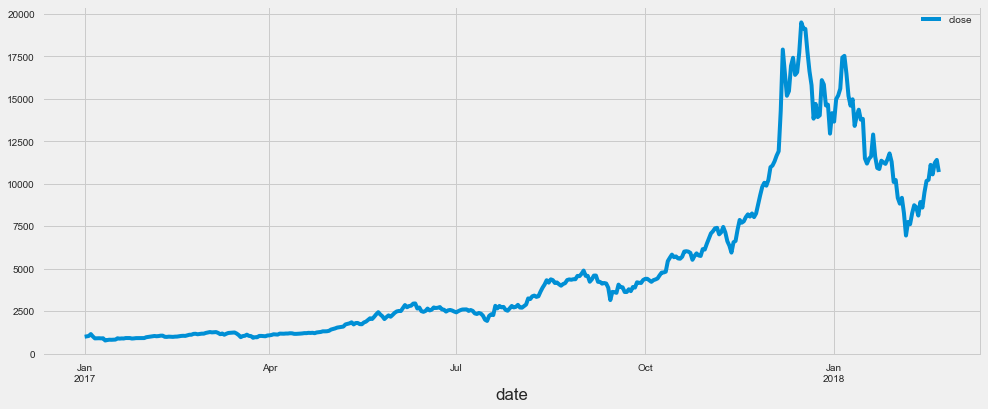

In [237]:
datasetBitcoinIndexedClose.plot(figsize=(15, 6))
plt.show()

In [238]:
datasetBitcoinMarket = datasetBitcoinIndexedMarket.reset_index()
datasetBitcoinMarket.head()

date       market
0 2017-01-01  15491200000
1 2017-01-02  16055100000
2 2017-01-03  16426600000
3 2017-01-04  16795400000
4 2017-01-05  18604000000

In [239]:
datasetBitcoinIndexedClose.columns

Index(['close'], dtype='object')

In [240]:
datasetBitcoinIndexedClose.head()

close
date               
2017-01-01   998.33
2017-01-02  1021.75
2017-01-03  1043.84
2017-01-04  1154.73
2017-01-05  1013.38

In [241]:
def showDecomposition(dataset):
    from pylab import rcParams
    import statsmodels.api as sm
    rcParams['figure.figsize'] = 11, 9
    decomposition = sm.tsa.seasonal_decompose(dataset, model='additive')
    fig = decomposition.plot()
    plt.show()

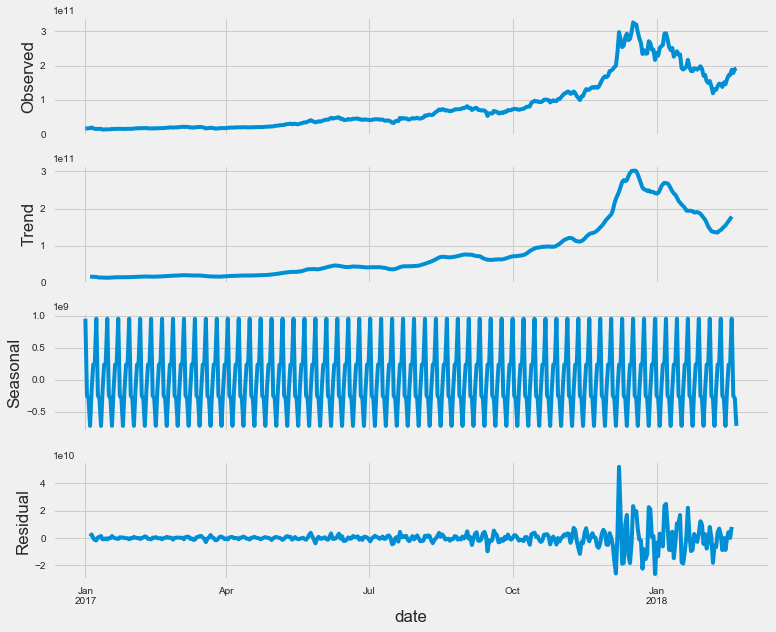

In [242]:
showDecomposition(datasetBitcoinIndexedMarket)

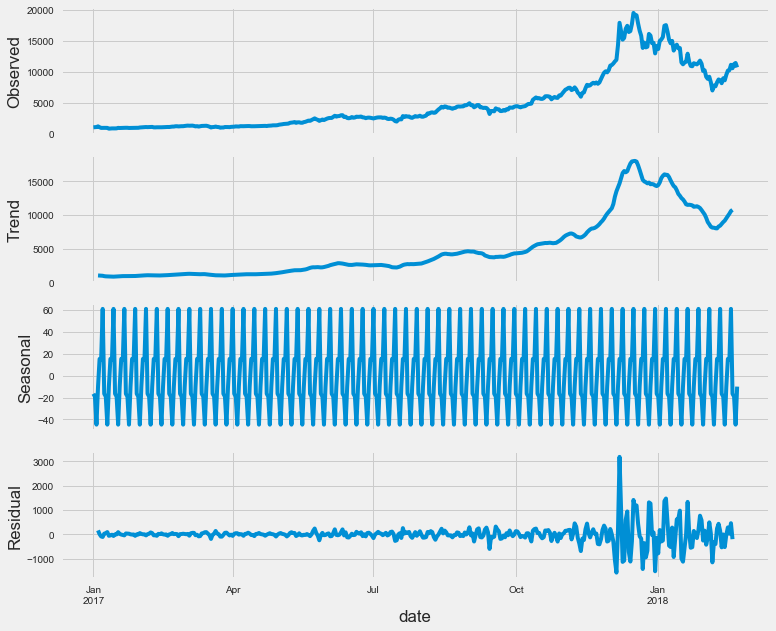

In [243]:
showDecomposition(datasetBitcoinIndexedClose)

# dealing with stationarity of time series

In [244]:
# http://dacatay.com/data-science/part-3-time-series-stationarity-python/
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

In [245]:
# apply the function to the time series
adf_test(datasetBitcoinIndexedClose['close'].values)

Results of Augmented Dickey-Fuller test:
test statistic           -0.833735
p-value                   0.809011
# of lags                17.000000
# of observations       399.000000
Critical Value (1%)      -3.446846
Critical Value (5%)      -2.868811
Critical Value (10%)     -2.570643
dtype: float64


In [246]:
import statsmodels.tsa.api as smt
def ts_diagnostics(y, lags = None, title = '', filename = ''):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
#     weekly moving averages (5 day window because of workdays)
    rollingMean = pd.rolling_mean(y,window = 12)
    rollingStd = pd.rolling_std(y,window = 12)
    
    
    fig = plt.figure(figsize=(14,12))
    layout = (3,2)
    tsAx = plt.subplot2grid(layout,(0,0), colspan=2)
    acfAx = plt.subplot2grid(layout, (1,0))
    pacfAx = plt.subplot2grid(layout, (1,1))
    qqAx = plt.subplot2grid(layout, (2,0))
    histAx = plt.subplot2grid(layout, (2,1))
    
#     time series plot
    y.plot(ax = tsAx)
    rollingMean.plot(ax = tsAx, color = 'crimson')
    rollingStd.plot(ax = tsAx, color = 'darkslateblue' )
    plt.legend(loc='best')
    tsAx.set_title(title,fontsize=24)
    
#     acf and pacf
    smt.graphics.plot_acf(y,lags=lags, ax = acfAx, alpha=0.5)
    smt.graphics.plot_pacf(y,lags=lags, ax = pacfAx, alpha=0.5)
    
#     qq plot
    sm.qqplot(y, line = 's', ax = qqAx)
    qqAx.set_title(' QQ plot')
    
#     hist plot
    y.plot(ax = histAx, kind = 'hist', bins= 25)
    histAx.set_title('Histogram')
    plt.tight_layout()
    plt.show()
    
    adf_test(y)
    return

In [247]:
#  first order differencing
def firstOrderDifferencing(y):
    y_diff = np.diff(y)
    ts_diagnostics(y_diff, lags = 30, title = 'first order differencing')

/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys
No handles with labels found to put in legend.


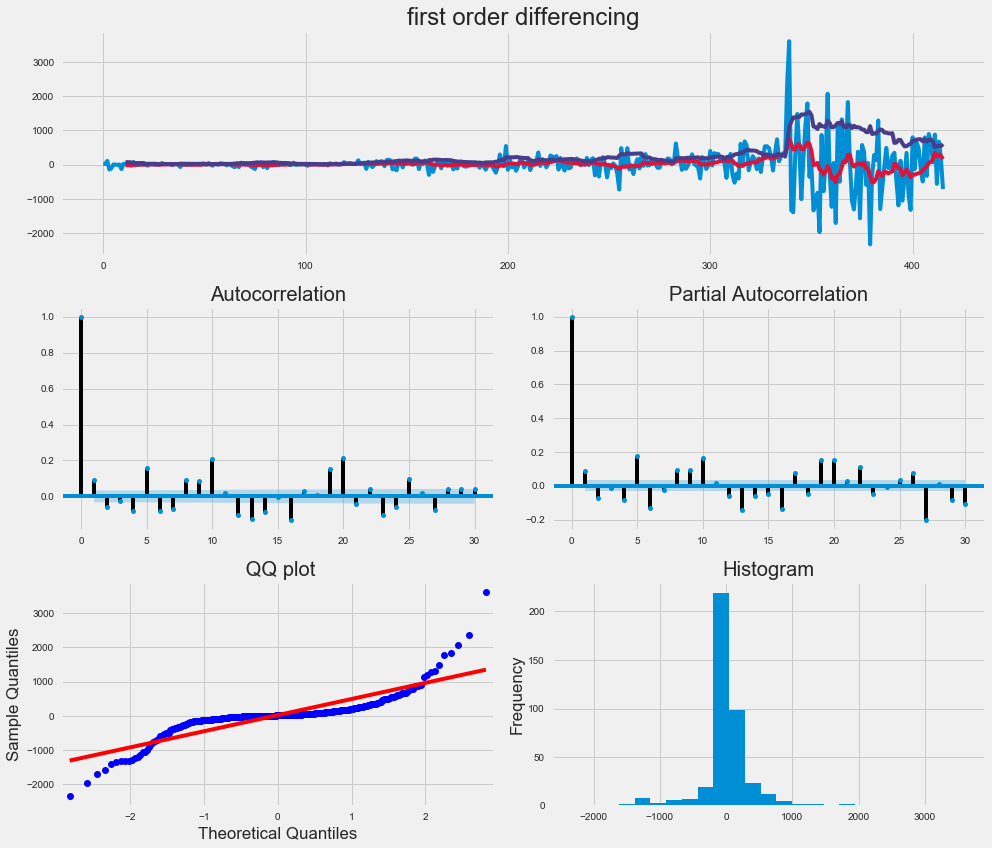

Results of Augmented Dickey-Fuller test:
test statistic           -4.370986
p-value                   0.000334
# of lags                18.000000
# of observations       397.000000
Critical Value (1%)      -3.446930
Critical Value (5%)      -2.868848
Critical Value (10%)     -2.570663
dtype: float64


In [248]:
firstOrderDifferencing(datasetBitcoinIndexedClose['close'].values)

In [249]:
def logStabalizer(df, attribute):
    new_df = df.copy(deep=True)
    y = df[attribute]
    y_log = np.log(y)
    ts_diagnostics(y_log, lags = 30, title = 'Log transformed')
    new_df[attribute] = y_log
    return new_df

/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys
No handles with labels found to put in legend.


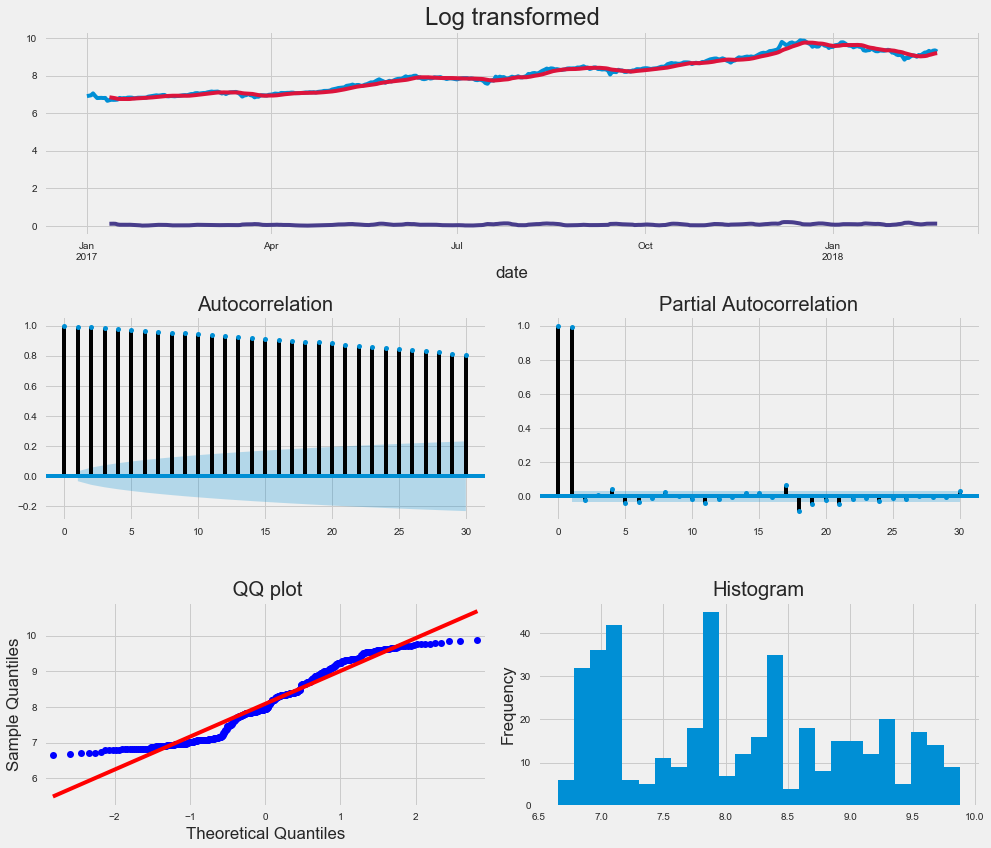

Results of Augmented Dickey-Fuller test:
test statistic           -0.567983
p-value                   0.878054
# of lags                 0.000000
# of observations       416.000000
Critical Value (1%)      -3.446168
Critical Value (5%)      -2.868513
Critical Value (10%)     -2.570484
dtype: float64


In [250]:
logstablizedCloseDF = logStabalizer(datasetBitcoinIndexedClose, 'close')

In [251]:
print(logstablizedCloseDF.head())
print(datasetBitcoinIndexedClose.head())

               close
date                
2017-01-01  6.906084
2017-01-02  6.929272
2017-01-03  6.950661
2017-01-04  7.051622
2017-01-05  6.921047
              close
date               
2017-01-01   998.33
2017-01-02  1021.75
2017-01-03  1043.84
2017-01-04  1154.73
2017-01-05  1013.38


In [252]:
def logTransformedFirstOrderDifference(df, attribute):
    y = df[attribute]
    indexes = df.index
    y_log = np.log(y)
    y_log_diff = np.diff(y_log)
    index_diff = indexes[1:]
    ts_diagnostics(y_log_diff, lags = 30, title = 'Log transformed first Differential Order')
    df_new = pd.DataFrame(data = y_log_diff, index = index_diff,columns = [attribute])
    return df_new

/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys
No handles with labels found to put in legend.


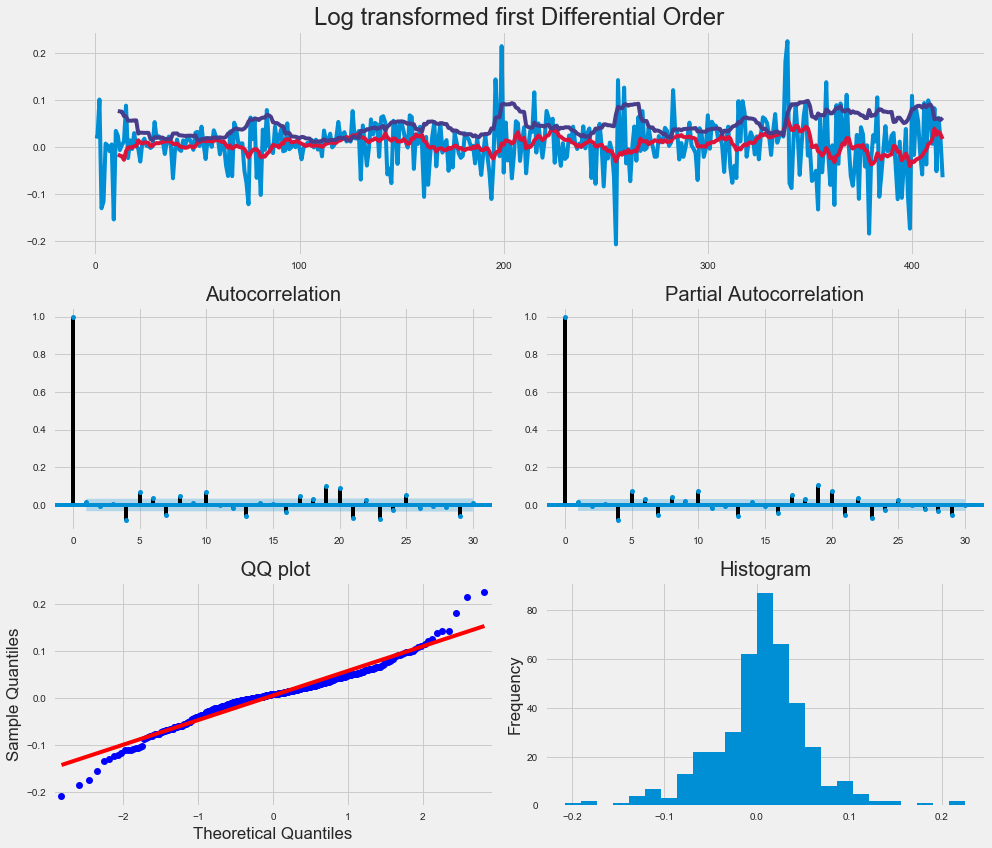

Results of Augmented Dickey-Fuller test:
test statistic          -19.970716
p-value                   0.000000
# of lags                 0.000000
# of observations       415.000000
Critical Value (1%)      -3.446206
Critical Value (5%)      -2.868530
Critical Value (10%)     -2.570493
dtype: float64


In [253]:
yLogTransformedSingleDifferentialDF = logTransformedFirstOrderDifference(datasetBitcoinIndexedClose, 'close')

In [254]:
yLogTransformedSingleDifferentialDF.head()

close
date                
2017-01-02  0.023188
2017-01-03  0.021389
2017-01-04  0.100960
2017-01-05 -0.130575
2017-01-06 -0.116210

In [255]:
def logTransformedSecondOrderDifference(df,attribute):
    indexes = df.index
    y = df[attribute]
    y_log = np.log(y)
    y_log_diff = np.diff(y_log)
    y_log_diff_diff = np.diff(y_log_diff)
    index_diff = indexes[2:]
    df_new = pd.DataFrame(data = y_log_diff_diff, index = index_diff,columns = [attribute])
#     y_log_diff_droppedNa = y_log_diff.dropna()
    ts_diagnostics(y_log_diff_diff, lags = 30, title = 'Log transformed second Differential Order')
    return df_new

/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys
No handles with labels found to put in legend.


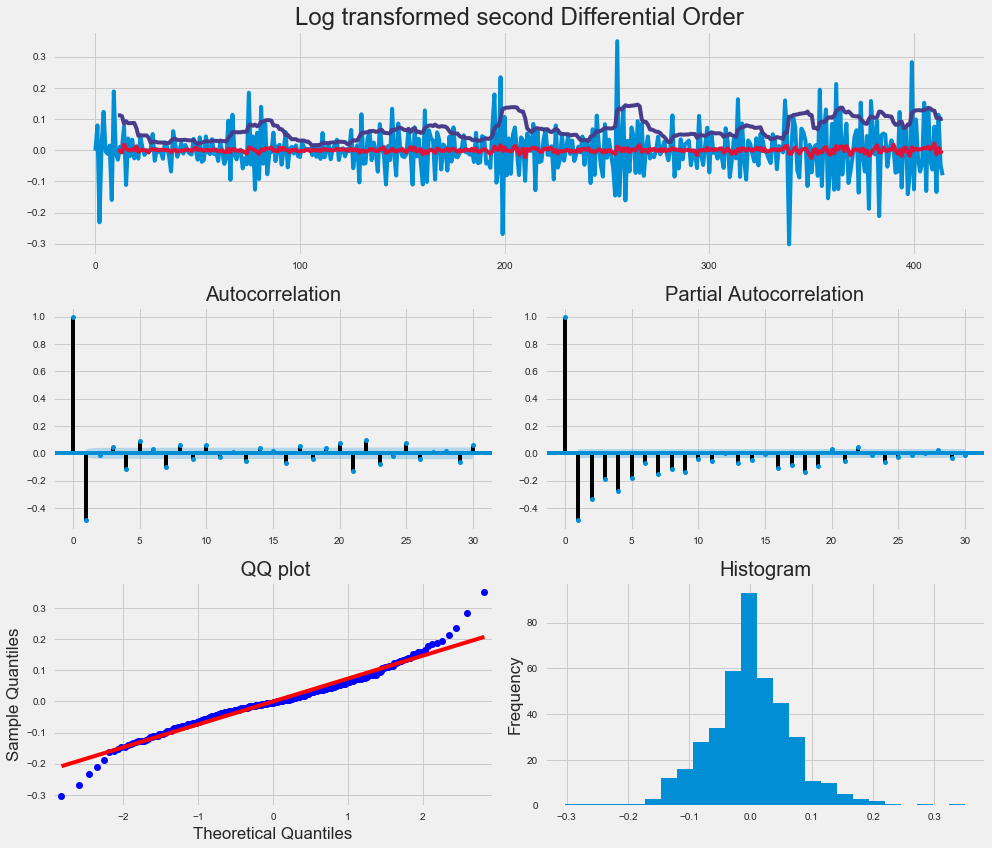

Results of Augmented Dickey-Fuller test:
test statistic         -8.991739e+00
p-value                 6.862504e-15
# of lags               1.800000e+01
# of observations       3.960000e+02
Critical Value (1%)    -3.446972e+00
Critical Value (5%)    -2.868866e+00
Critical Value (10%)   -2.570673e+00
dtype: float64


In [256]:
yLogTransformedDoubleDifferentialDF = logTransformedSecondOrderDifference(datasetBitcoinIndexedClose, 'close')

In [257]:
yLogTransformedDoubleDifferentialDF.head()

close
date                
2017-01-03 -0.001799
2017-01-04  0.079571
2017-01-05 -0.231536
2017-01-06  0.014365
2017-01-07  0.123268

In [258]:
def FirstOrderDifference(y):
#     y_log = np.log(y)
    y_diff = np.diff(y)
#     y_log_diff_diff = np.diff(y_log_diff)
#     y_log_diff_droppedNa = y_log_diff.dropna()
    ts_diagnostics(y_diff, lags = 30, title = 'first Differential Order')
    return y_diff

/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys
No handles with labels found to put in legend.


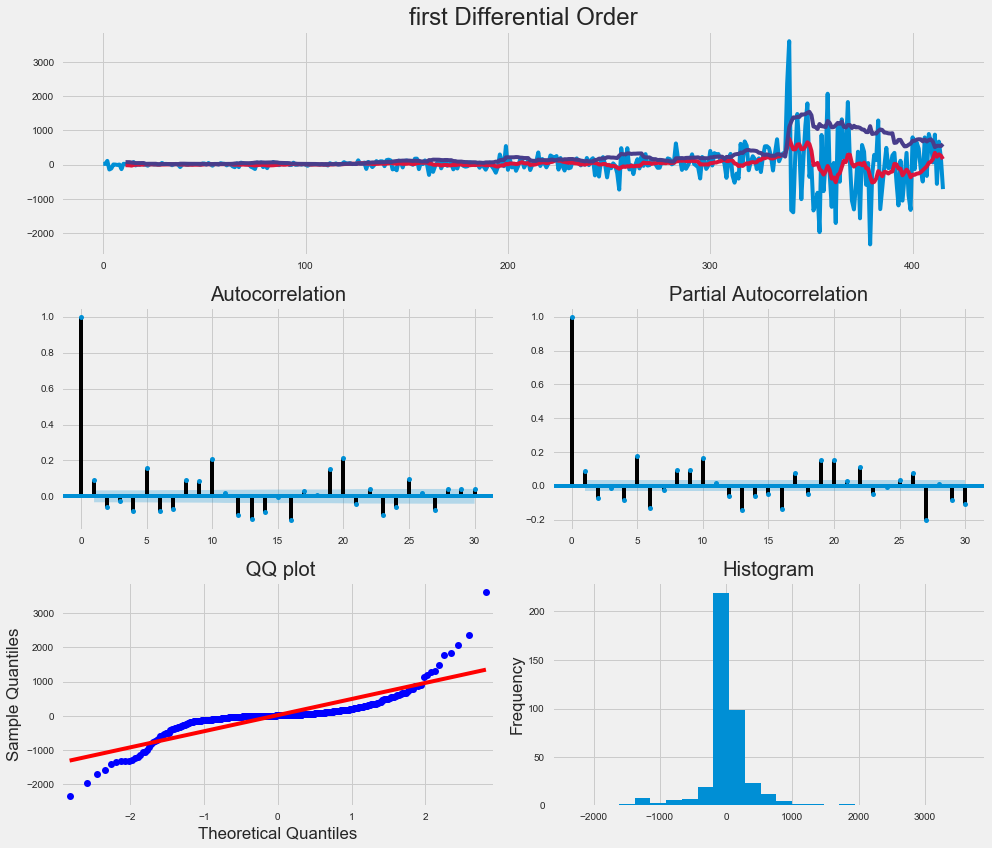

Results of Augmented Dickey-Fuller test:
test statistic           -4.370986
p-value                   0.000334
# of lags                18.000000
# of observations       397.000000
Critical Value (1%)      -3.446930
Critical Value (5%)      -2.868848
Critical Value (10%)     -2.570663
dtype: float64


In [259]:
ySingleDifferential = FirstOrderDifference(datasetBitcoinIndexedClose['close'].values)

In [260]:
def SecondOrderDifference(y):
#     y_log = np.log(y)
    y_diff = np.diff(y)
    y_diff_diff = np.diff(y_diff)
#     y_log_diff_diff = np.diff(y_log_diff)
#     y_log_diff_droppedNa = y_log_diff.dropna()
    ts_diagnostics(y_diff_diff, lags = 30, title = 'Second Differential Order')
    return y_diff_diff

/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/jatintaneja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys
No handles with labels found to put in legend.


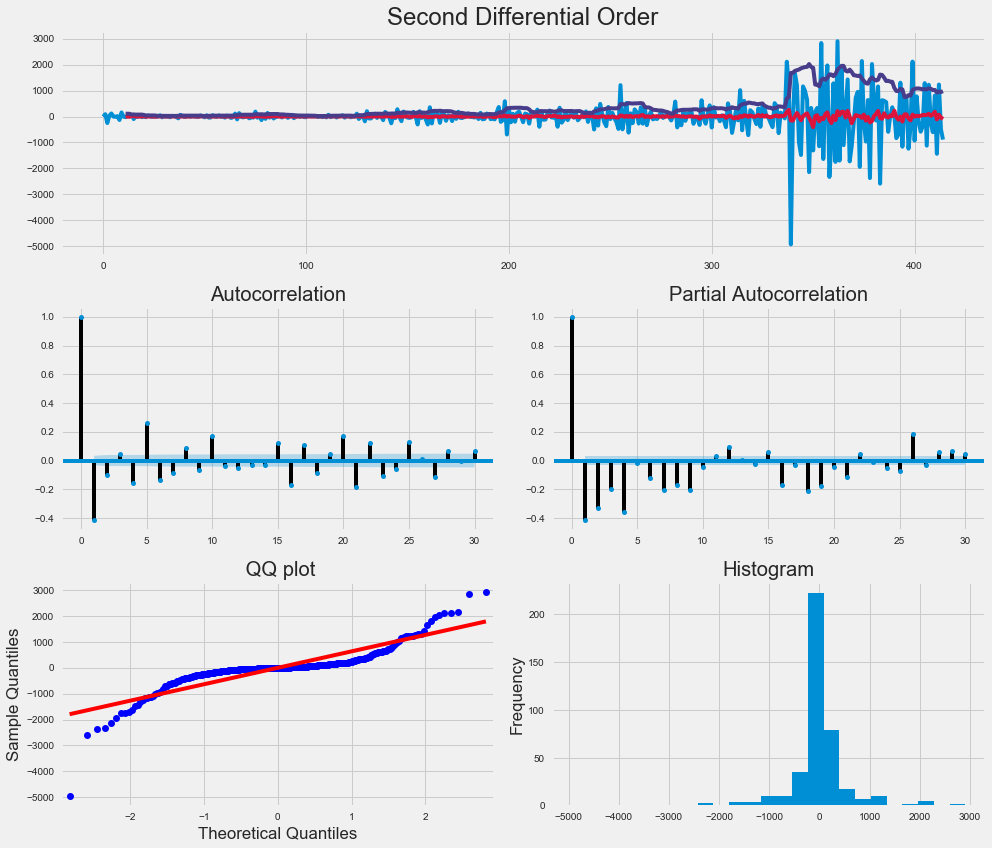

Results of Augmented Dickey-Fuller test:
test statistic         -9.073125e+00
p-value                 4.249073e-15
# of lags               1.800000e+01
# of observations       3.960000e+02
Critical Value (1%)    -3.446972e+00
Critical Value (5%)    -2.868866e+00
Critical Value (10%)   -2.570673e+00
dtype: float64


In [261]:
ySingleDifferential = SecondOrderDifference(datasetBitcoinIndexedClose['close'].values)

# ACF, PACF graphs

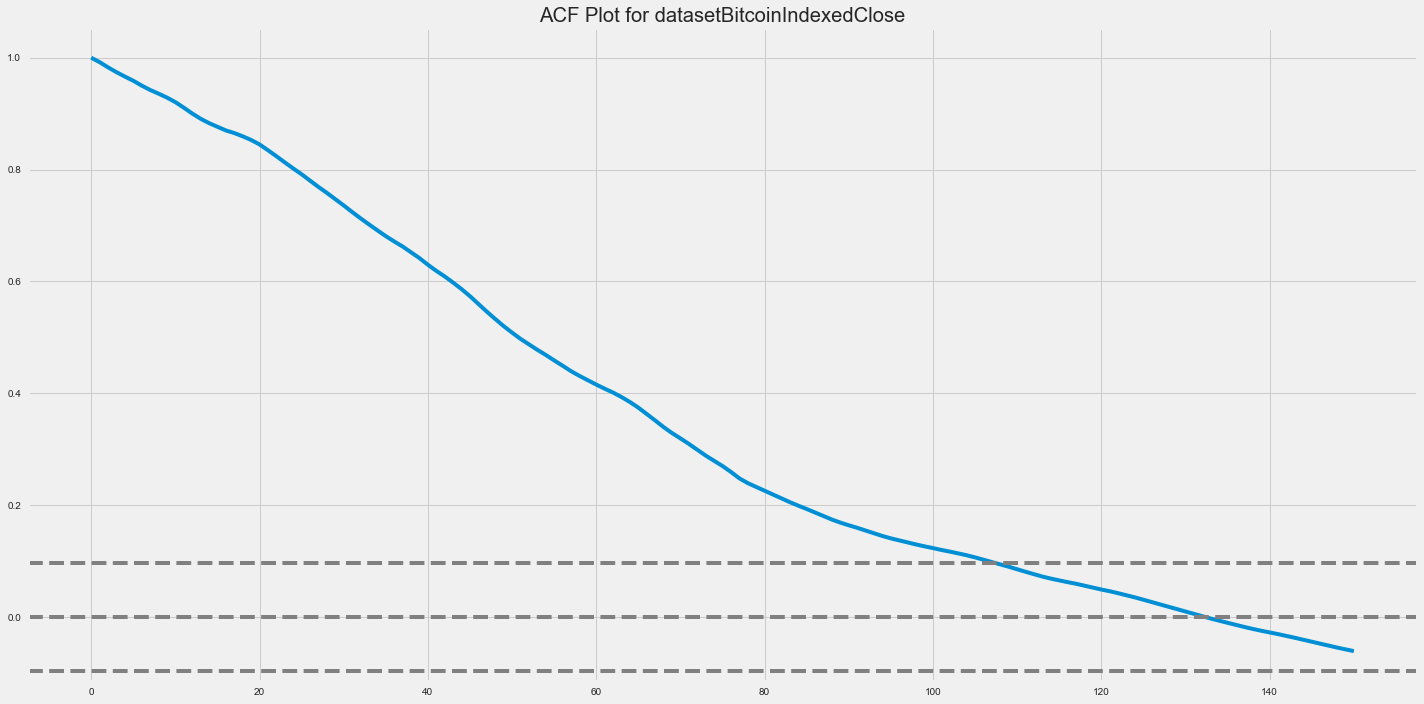

In [262]:
#  plotting ACF
from statsmodels.tsa.stattools import acf, pacf
lag = 150
lag_acf = acf(datasetBitcoinIndexedClose, nlags=lag)
plt.figure(figsize = (20,10))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetBitcoinIndexedClose)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(datasetBitcoinIndexedClose)), linestyle = '--', color = 'grey')
plt.title('ACF Plot for datasetBitcoinIndexedClose')
plt.tight_layout()
plt.show()

# plt.figure(figsize=(20,10))
# plot_acf(yLogTransformedDoubleDifferential, ax=plt.gca(), lags = lag)
# plt.show()

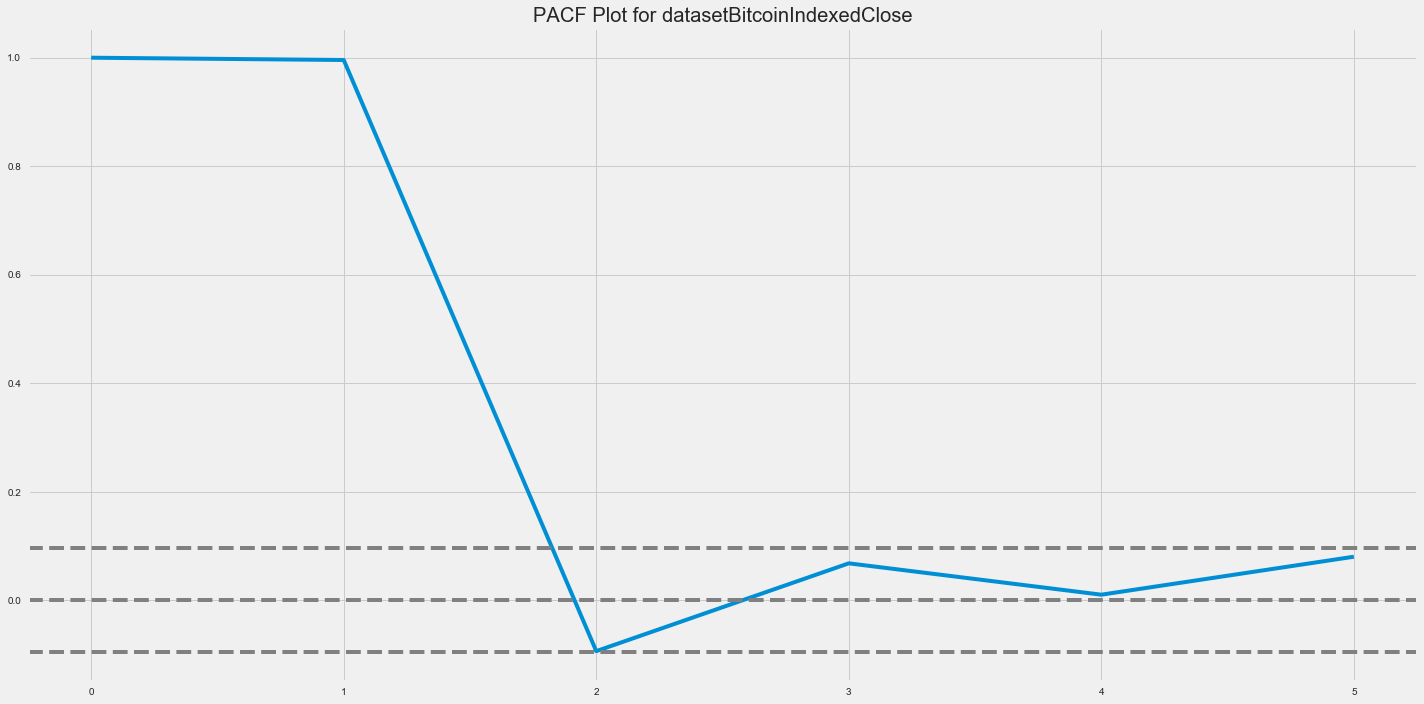

In [263]:
#  plotting PACF
from statsmodels.tsa.stattools import acf, pacf
lag = 5
lag_pacf = pacf(datasetBitcoinIndexedClose, nlags=lag, method = 'ols')
plt.figure(figsize = (20,10))
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetBitcoinIndexedClose)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(datasetBitcoinIndexedClose)), linestyle = '--', color = 'grey')
plt.title('PACF Plot for datasetBitcoinIndexedClose')
plt.tight_layout()
plt.show()

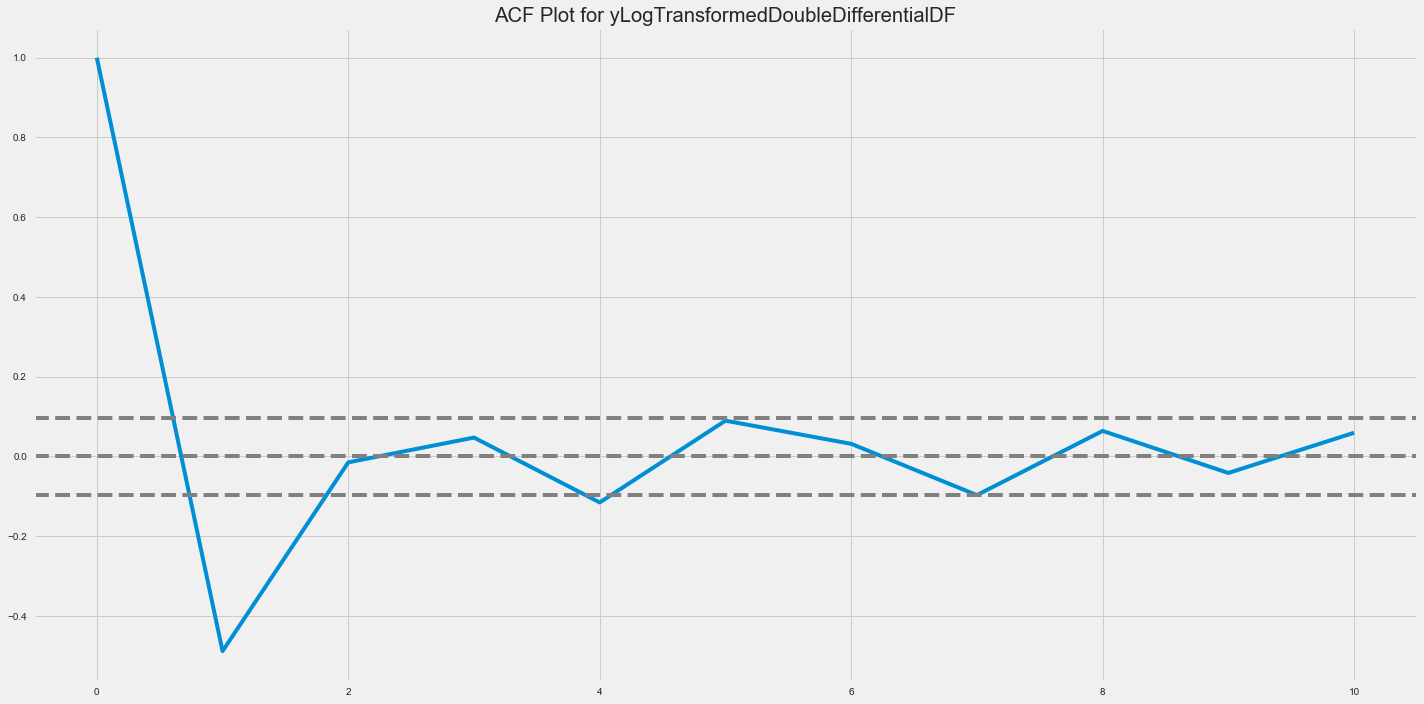

In [264]:
#  plotting ACF
from statsmodels.tsa.stattools import acf, pacf
lag = 10
lag_acf = acf(yLogTransformedDoubleDifferentialDF, nlags=lag)
plt.figure(figsize = (20,10))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(yLogTransformedDoubleDifferentialDF)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(yLogTransformedDoubleDifferentialDF)), linestyle = '--', color = 'grey')
plt.title('ACF Plot for yLogTransformedDoubleDifferentialDF')
plt.tight_layout()
plt.show()

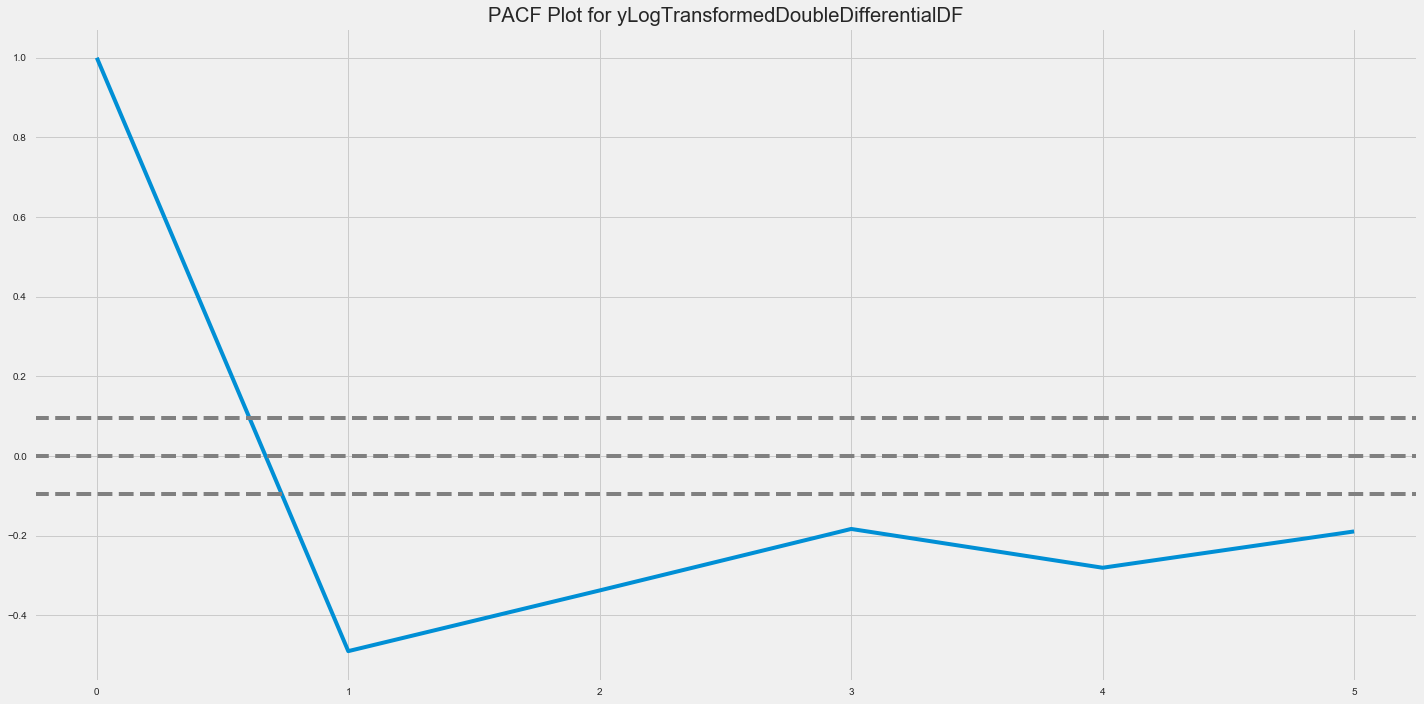

In [265]:
#  plotting PACF
from statsmodels.tsa.stattools import acf, pacf
lag = 5
lag_pacf = pacf(yLogTransformedDoubleDifferentialDF, nlags=lag, method = 'ols')
plt.figure(figsize = (20,10))
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(yLogTransformedDoubleDifferentialDF)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(yLogTransformedDoubleDifferentialDF)), linestyle = '--', color = 'grey')
plt.title('PACF Plot for yLogTransformedDoubleDifferentialDF')
plt.tight_layout()
plt.show()

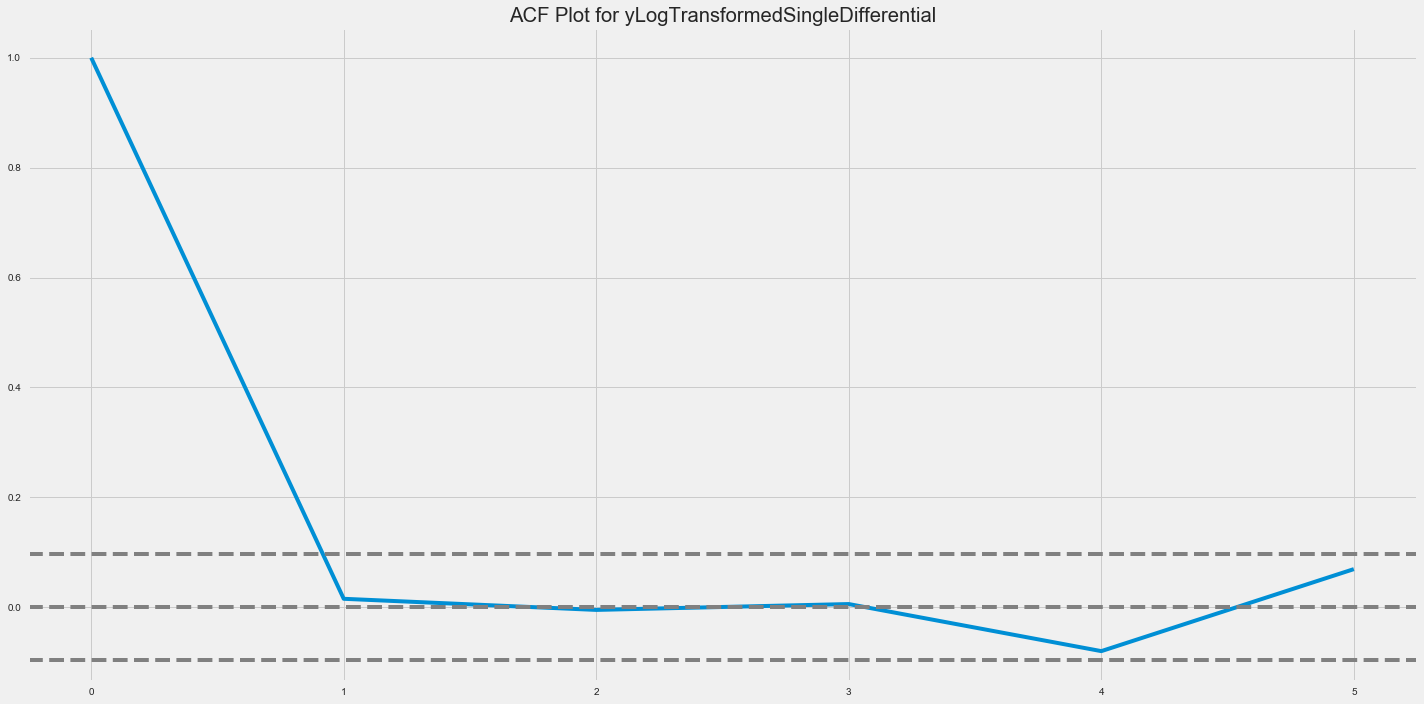

In [268]:
#  plotting ACF
from statsmodels.tsa.stattools import acf, pacf
lag = 5
lag_acf = acf(yLogTransformedSingleDifferentialDF, nlags=lag)
plt.figure(figsize = (20,10))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(yLogTransformedSingleDifferentialDF)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(yLogTransformedSingleDifferentialDF)), linestyle = '--', color = 'grey')
plt.title('ACF Plot for yLogTransformedSingleDifferential')
plt.tight_layout()
plt.show()

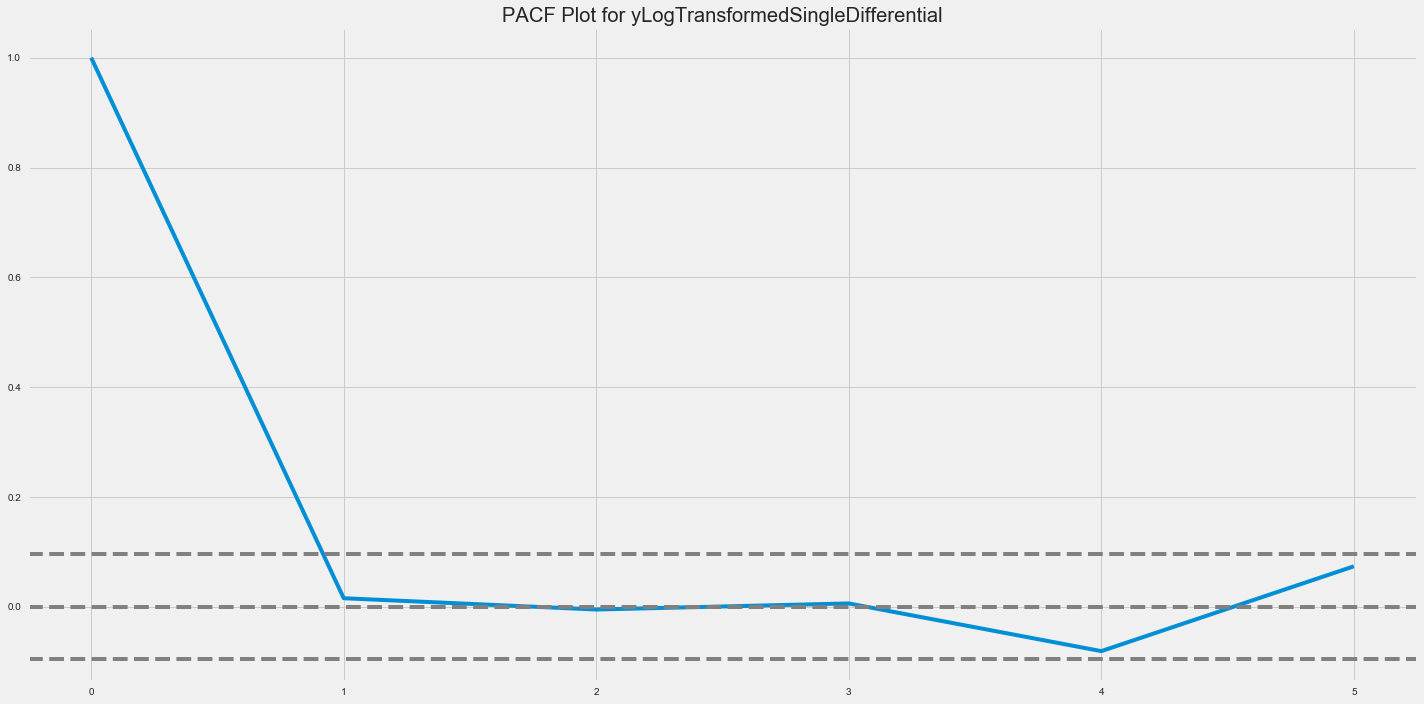

In [270]:
#  plotting PACF
from statsmodels.tsa.stattools import acf, pacf
lag = 5
lag_pacf = pacf(yLogTransformedSingleDifferentialDF, nlags=lag, method = 'ols')
plt.figure(figsize = (20,10))
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(yLogTransformedSingleDifferentialDF)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(yLogTransformedSingleDifferentialDF)), linestyle = '--', color = 'grey')
plt.title('PACF Plot for yLogTransformedSingleDifferential')
plt.tight_layout()
plt.show()

#  SARIMAX Model

In [272]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [273]:
# Load data
dataset = pd.read_csv('crypto-markets.csv')
dataset.head()

slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   

    close  volume      market  close_ratio  spread  
0  134.21       0  1500520000       0.5438    3.88  
1  144.54       0  1491160000       0.7813   13.49  
2  139.00       0  1597780000       0.3843   12.88  
3  116.99       0  1542820000       0.2882   32.17  
4  105.21       0  1292190000       0.3881   33.32

In [274]:
bitcoinDataset = dataset.loc[dataset.name == 'Bitcoin']
bitcoinDataset.head()

slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   

    close  volume      market  close_ratio  spread  
0  134.21       0  1500520000       0.5438    3.88  
1  144.54       0  1491160000       0.7813   13.49  
2  139.00       0  1597780000       0.3843   12.88  
3  116.99       0  1542820000       0.2882   32.17  
4  105.21       0  1292190000       0.3881   33.32

In [275]:
# # Unix-time to 
bitcoinDataset.date = pd.to_datetime(bitcoinDataset.date)

# # Resampling to daily frequency
bitcoinDataset.index = bitcoinDataset.date
# dataset = dataset.resample('D').mean()
# bitcoinDataset.head()

# # Resampling to monthly frequency
bitcoinDataset_month = bitcoinDataset.resample('M').mean()

# # # Resampling to annual frequency
bitcoinDataset_year = bitcoinDataset.resample('A-DEC').mean()

# # # Resampling to quarterly frequency
bitcoinDataset_Q = bitcoinDataset.resample('Q-DEC').mean()

In [276]:
bitcoinDataset_Q.head()

ranknow        open        high         low       close  \
date                                                                  
2013-06-30      1.0  115.757656  118.935000  110.626250  115.162187   
2013-09-30      1.0  110.971522  114.466630  108.289022  111.291196   
2013-12-31      1.0  496.291522  528.795435  460.772065  502.657609   
2014-03-31      1.0  703.839111  724.764111  676.612889  700.586000   
2014-06-30      1.0  518.866593  531.666703  507.435055  520.929341   

                  volume        market  close_ratio     spread  
date                                                            
2013-06-30  0.000000e+00  1.297931e+09     0.555067   8.308750  
2013-09-30  0.000000e+00  1.284726e+09     0.486023   6.177609  
2013-12-31  1.521574e+06  5.983483e+09     0.671599  68.023370  
2014-03-31  3.541169e+07  8.709987e+09     0.478787  48.151222  
2014-06-30  2.213710e+07  6.634943e+09     0.548916  24.231648

Dickey–Fuller test: p=0.998818


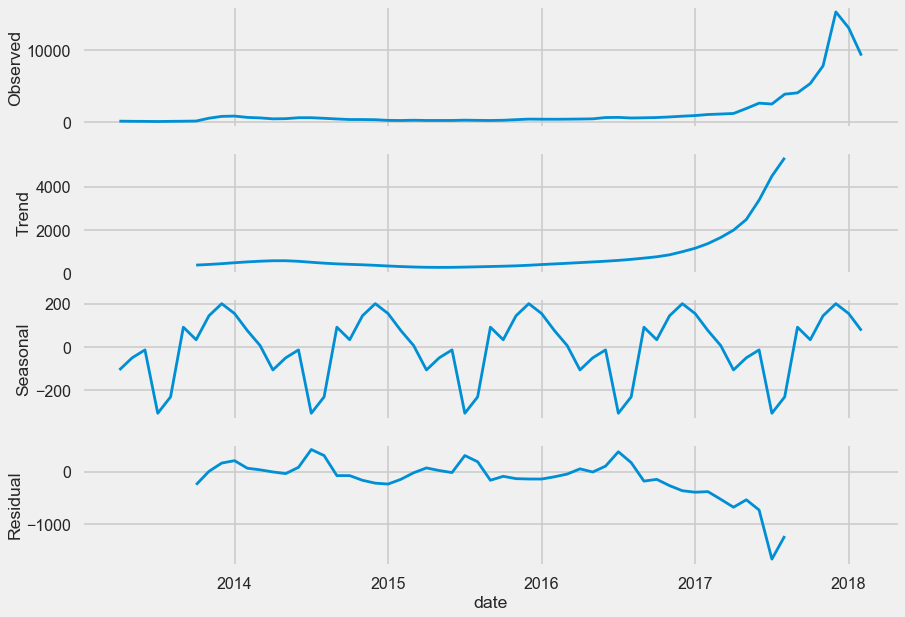

In [277]:
# dataset.head()
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(bitcoinDataset_month.close).plot()

print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(bitcoinDataset_month.close)[1])
plt.show()

In [278]:
# Box-Cox Transformations
bitcoinDataset_month['Close_Price_box'], lmbda = stats.boxcox(bitcoinDataset_month.close)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(bitcoinDataset_month.close)[1])

Dickey–Fuller test: p=0.998818


In [279]:
    # Seasonal differentiation
# bitcoinDataset_month['prices_box_diff'] = bitcoinDataset_month.Close_Price_box - bitcoinDataset_month.Close_Price_box.shift(12)
bitcoinDataset_month['prices_box_diff'] = bitcoinDataset_month.Close_Price_box - bitcoinDataset_month.Close_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(bitcoinDataset_month.prices_box_diff[12:])[1])



Dickey–Fuller test: p=0.666118


Dickey–Fuller test: p=0.002295


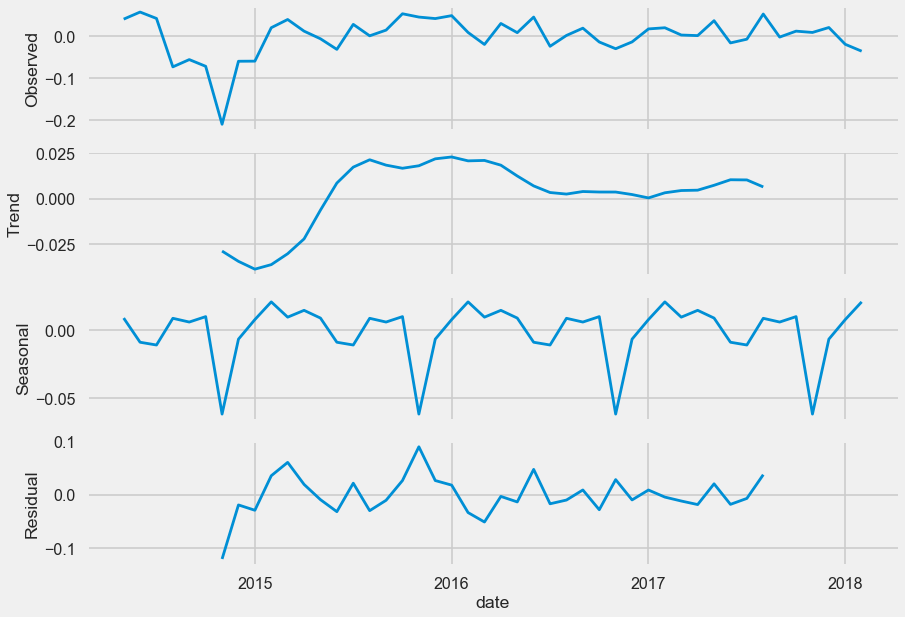

In [280]:
# Regular differentiation
bitcoinDataset_month['prices_box_diff2'] = bitcoinDataset_month.prices_box_diff - bitcoinDataset_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(bitcoinDataset_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(bitcoinDataset_month.prices_box_diff2[13:])[1])

plt.show()

In [281]:
bitcoinDataset_month

ranknow          open          high           low         close  \
date                                                                          
2013-04-30      1.0    137.913333    143.466667    133.383333    139.250000   
2013-05-31      1.0    120.292258    123.949032    114.253548    119.993226   
2013-06-30      1.0    108.856333    111.300667    104.602333    107.761333   
2013-07-31      1.0     90.311613     93.869032     86.719355     90.512258   
2013-08-31      1.0    113.041935    116.002258    111.388065    113.905161   
2013-09-30      1.0    130.180667    134.164000    127.375333    130.061667   
2013-10-31      1.0    156.031613    161.944194    151.148065    158.311935   
2013-11-30      1.0    520.506000    569.307000    492.191000    550.420667   
2013-12-31      1.0    813.118065    856.441935    739.990645    800.780968   
2014-01-31      1.0    841.702258    870.550645    814.900645    844.168387   
2014-02-28      1.0    670.839286    690.556071    632.392500    661.618214   
2014-03-31      1.0    595.782258    609.875161    578.266129    592.200323   
2014-04-30      1.0    461.649000    476.665667    444.637667    461.362000   
2014-05-31      1.0    480.991290    492.493871    475.034194    486.651290   
2014-06-30      1.0    615.222000    627.146333    603.713333    615.917333   
2014-07-31      1.0    619.773548    624.210645    612.974194    618.025484   
2014-08-31      1.0    539.688065    546.535806    527.420968    536.087742   
2014-09-30      1.0    448.100333    454.653667    438.951667    445.186333   
2014-10-31      1.0    365.748387    374.314839    354.857097    364.150000   
2014-11-30      1.0    364.850667    376.494667    357.242000    366.100000   
2014-12-31      1.0    343.074516    347.486774    336.565806    341.268387   
2015-01-31      1.0    251.800000    261.390968    240.495806    248.782581   
2015-02-28      1.0    232.821429    240.212143    227.768571    234.153571   
2015-03-31      1.0    269.278710    274.851613    263.133871    269.041290   
2015-04-30      1.0    235.707667    238.958000    231.734667    235.491667   
2015-05-31      1.0    237.162258    239.562903    234.938710    236.996774   
2015-06-30      1.0    236.941333    240.126667    235.028333    238.081000   
2015-07-31      1.0    278.857742    284.122581    274.771290    279.563871   
2015-08-31      1.0    252.987742    256.415806    247.146452    250.734516   
2015-09-30      1.0    233.487667    236.685333    231.632000    233.595333   
2015-10-31      1.0    262.305484    267.740323    260.490645    264.855161   
2015-11-30      1.0    346.866333    361.374333    336.263667    348.883333   
2015-12-31      1.0    422.618387    431.569032    413.460000    424.464516   
2016-01-31      1.0    412.805806    418.802581    403.494839    410.844516   
2016-02-29      1.0    402.304828    408.422414    398.191034    404.408276   
2016-03-31      1.0    417.261935    420.027742    413.330968    416.525161   
2016-04-30      1.0    433.487333    436.753333    430.642333    434.339333   
2016-05-31      1.0    459.237419    466.129677    455.771935    461.953871   
2016-06-30      1.0    638.544333    657.878667    619.871333    642.869667   
2016-07-31      1.0    662.977419    670.275484    652.487419    661.355484   
2016-08-31      1.0    581.238710    586.166452    574.551290    579.585161   
2016-09-30      1.0    604.613667    608.348000    601.865000    605.848333   
2016-10-31      1.0    640.702581    646.445806    638.005161    643.550000   
2016-11-30      1.0    725.073667    733.670000    716.785333    726.349000   
2016-12-31      1.0    821.107742    832.504516    814.082581    828.059677   
2017-01-31      1.0    914.681290    937.450000    887.202581    914.916452   
2017-02-28      1.0   1055.620000   1073.503571   1040.417500   1062.533214   
2017-03-31      1.0   1133.212258   1161.893226   1099.865484   1129.365484   
2017-04-30      1.0   1197.647000   1216.303000   1188.385000 

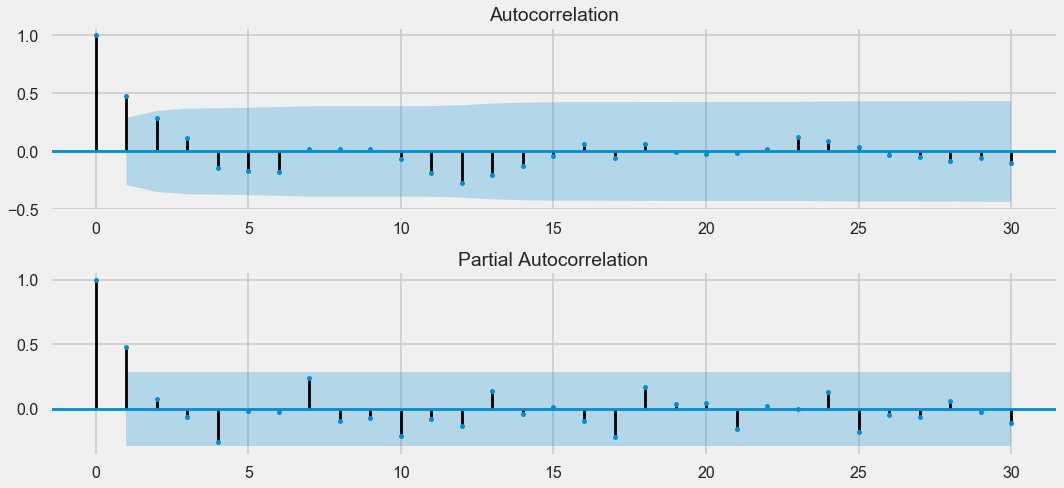

In [282]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(bitcoinDataset_month.prices_box_diff2[13:].values.squeeze(), lags=30, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(bitcoinDataset_month.prices_box_diff2[13:].values.squeeze(), lags=30, ax=ax)
plt.tight_layout()
plt.show()

In [283]:
bitcoinDataset_month

ranknow          open          high           low         close  \
date                                                                          
2013-04-30      1.0    137.913333    143.466667    133.383333    139.250000   
2013-05-31      1.0    120.292258    123.949032    114.253548    119.993226   
2013-06-30      1.0    108.856333    111.300667    104.602333    107.761333   
2013-07-31      1.0     90.311613     93.869032     86.719355     90.512258   
2013-08-31      1.0    113.041935    116.002258    111.388065    113.905161   
2013-09-30      1.0    130.180667    134.164000    127.375333    130.061667   
2013-10-31      1.0    156.031613    161.944194    151.148065    158.311935   
2013-11-30      1.0    520.506000    569.307000    492.191000    550.420667   
2013-12-31      1.0    813.118065    856.441935    739.990645    800.780968   
2014-01-31      1.0    841.702258    870.550645    814.900645    844.168387   
2014-02-28      1.0    670.839286    690.556071    632.392500    661.618214   
2014-03-31      1.0    595.782258    609.875161    578.266129    592.200323   
2014-04-30      1.0    461.649000    476.665667    444.637667    461.362000   
2014-05-31      1.0    480.991290    492.493871    475.034194    486.651290   
2014-06-30      1.0    615.222000    627.146333    603.713333    615.917333   
2014-07-31      1.0    619.773548    624.210645    612.974194    618.025484   
2014-08-31      1.0    539.688065    546.535806    527.420968    536.087742   
2014-09-30      1.0    448.100333    454.653667    438.951667    445.186333   
2014-10-31      1.0    365.748387    374.314839    354.857097    364.150000   
2014-11-30      1.0    364.850667    376.494667    357.242000    366.100000   
2014-12-31      1.0    343.074516    347.486774    336.565806    341.268387   
2015-01-31      1.0    251.800000    261.390968    240.495806    248.782581   
2015-02-28      1.0    232.821429    240.212143    227.768571    234.153571   
2015-03-31      1.0    269.278710    274.851613    263.133871    269.041290   
2015-04-30      1.0    235.707667    238.958000    231.734667    235.491667   
2015-05-31      1.0    237.162258    239.562903    234.938710    236.996774   
2015-06-30      1.0    236.941333    240.126667    235.028333    238.081000   
2015-07-31      1.0    278.857742    284.122581    274.771290    279.563871   
2015-08-31      1.0    252.987742    256.415806    247.146452    250.734516   
2015-09-30      1.0    233.487667    236.685333    231.632000    233.595333   
2015-10-31      1.0    262.305484    267.740323    260.490645    264.855161   
2015-11-30      1.0    346.866333    361.374333    336.263667    348.883333   
2015-12-31      1.0    422.618387    431.569032    413.460000    424.464516   
2016-01-31      1.0    412.805806    418.802581    403.494839    410.844516   
2016-02-29      1.0    402.304828    408.422414    398.191034    404.408276   
2016-03-31      1.0    417.261935    420.027742    413.330968    416.525161   
2016-04-30      1.0    433.487333    436.753333    430.642333    434.339333   
2016-05-31      1.0    459.237419    466.129677    455.771935    461.953871   
2016-06-30      1.0    638.544333    657.878667    619.871333    642.869667   
2016-07-31      1.0    662.977419    670.275484    652.487419    661.355484   
2016-08-31      1.0    581.238710    586.166452    574.551290    579.585161   
2016-09-30      1.0    604.613667    608.348000    601.865000    605.848333   
2016-10-31      1.0    640.702581    646.445806    638.005161    643.550000   
2016-11-30      1.0    725.073667    733.670000    716.785333    726.349000   
2016-12-31      1.0    821.107742    832.504516    814.082581    828.059677   
2017-01-31      1.0    914.681290    937.450000    887.202581    914.916452   
2017-02-28      1.0   1055.620000   1073.503571   1040.417500   1062.533214   
2017-03-31      1.0   1133.212258   1161.893226   1099.865484   1129.365484   
2017-04-30      1.0   1197.647000   1216.303000   1188.385000 

In [284]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(bitcoinDataset_month.Close_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 0)
wrong parameters: (0, 0, 0, 1)
wrong parameters: (0, 0, 1, 1)
wrong parameters: (0, 0, 2, 1)
wrong parameters: (0, 1, 0, 1)
wrong parameters: (0, 1, 1, 1)
wrong parameters: (0, 1, 2, 1)
wrong parameters: (0, 2, 0, 1)
wrong parameters: (0, 2, 1, 1)
wrong parameters: (0, 2, 2, 1)
wrong parameters: (1, 0, 0, 1)
wrong parameters: (1, 0, 1, 1)
wrong parameters: (1, 0, 2, 1)
wrong parameters: (1, 1, 0, 1)
wrong parameters: (1, 1, 1, 1)
wrong parameters: (1, 1, 2, 1)
wrong parameters: (1, 2, 0, 1)
wrong parameters: (1, 2, 1, 1)
wrong parameters: (1, 2, 2, 1)
wrong parameters: (2, 0, 0, 1)
wrong parameters: (2, 0, 1, 1)
wrong parameters: (2, 0, 2, 1)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 1)
wrong parameters: (2, 1, 2, 1)
wrong parameters: (2, 2, 0, 1)
wrong parameters: (2, 2, 1, 1)
wrong parameters: (2, 2, 2, 1)


In [285]:
bitcoinDataset_month.Close_Price_box

date
2013-04-30    2.512122
2013-05-31    2.479668
2013-06-30    2.455265
2013-07-31    2.413881
2013-08-31    2.467952
2013-09-30    2.497425
2013-10-31    2.538909
2013-11-30    2.750007
2013-12-31    2.798993
2014-01-31    2.805436
2014-02-28    2.774768
2014-03-31    2.760024
2014-04-30    2.724876
2014-05-31    2.732621
2014-06-30    2.765306
2014-07-31    2.765762
2014-08-31    2.746338
2014-09-30    2.719623
2014-10-31    2.688929
2014-11-30    2.689770
2014-12-31    2.678596
2015-01-31    2.625148
2015-02-28    2.614282
2015-03-31    2.638882
2015-04-30    2.615313
2015-05-31    2.616463
2015-06-30    2.617285
2015-07-31    2.645491
2015-08-31    2.626534
2015-09-30    2.613850
2015-10-31    2.636158
2015-11-30    2.682133
2015-12-31    2.712516
2016-01-31    2.707591
2016-02-29    2.705189
2016-03-31    2.709671
2016-04-30    2.715958
2016-05-31    2.725064
2016-06-30    2.770993
2016-07-31    2.774716
2016-08-31    2.757099
2016-09-30    2.763096
2016-10-31    2.771133
2016-1

In [286]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
9   (1, 0, 1, 0) -162.369463
18  (2, 0, 1, 0) -161.044431
12  (1, 1, 1, 0) -160.880955
8   (1, 0, 0, 0) -160.622785
3   (0, 1, 1, 0) -160.434607
                                 Statespace Model Results                                 
Dep. Variable:                    Close_Price_box   No. Observations:                   59
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  84.185
Date:                            Sun, 22 Apr 2018   AIC                           -162.369
Time:                                    02:30:57   BIC                           -156.137
Sample:                                04-30-2013   HQIC                          -159.937
                                     - 02-28-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

Dickey–Fuller test:: p=0.001372


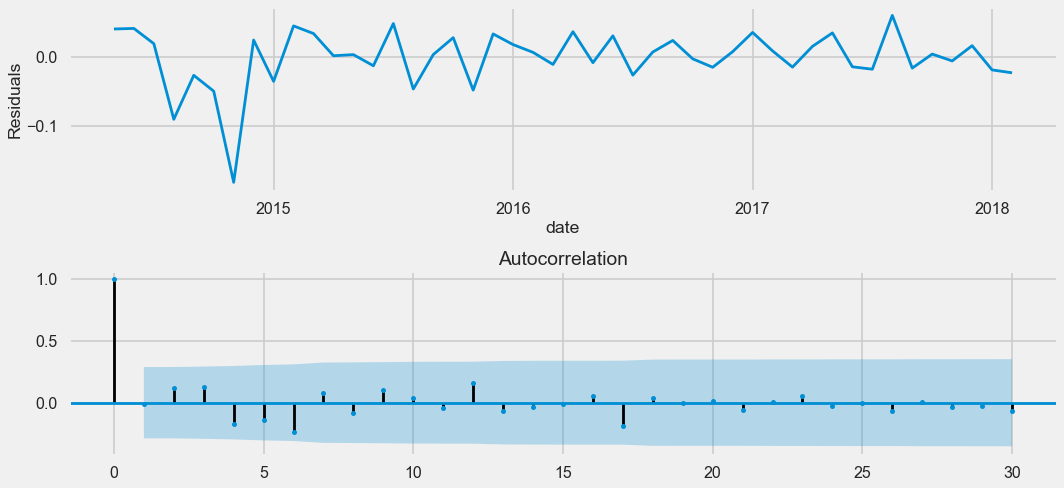

In [287]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel('Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=30, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [288]:
len(best_model.resid[13:].values)

46

In [290]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(np.absolute(lmbda*y+1))/lmbda))

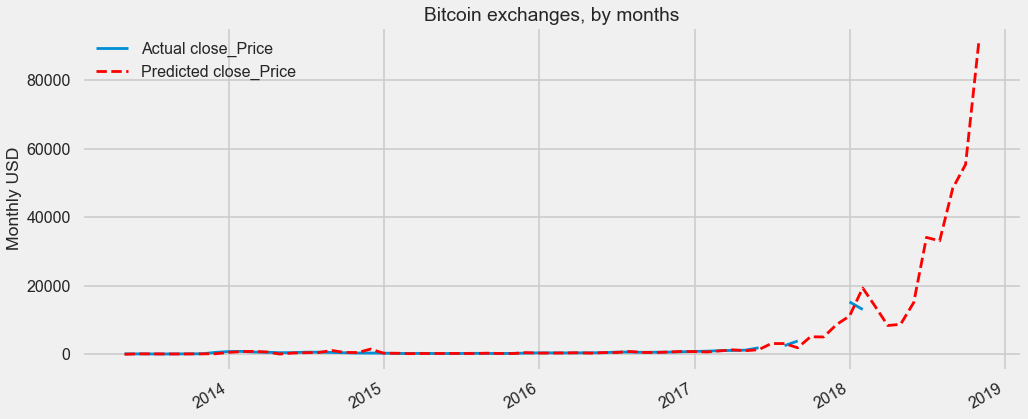

In [292]:
# Prediction
bitcoinDataset_month2 = bitcoinDataset_month[['close']]
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
             datetime(2018, 2, 28), datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31),
             datetime(2018, 6, 30), datetime(2018, 7, 31), datetime(2018, 8, 31), datetime(2018, 9, 30), 
            datetime(2018, 10, 31)]
future = pd.DataFrame(index=date_list, columns= bitcoinDataset_month.columns)
bitcoinDataset_month2 = pd.concat([bitcoinDataset_month2, future])
bitcoinDataset_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
bitcoinDataset_month2.close.plot(label='Actual close_Price')
bitcoinDataset_month2.forecast.plot(color='r', ls='--', label='Predicted close_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('Monthly USD')
plt.show()

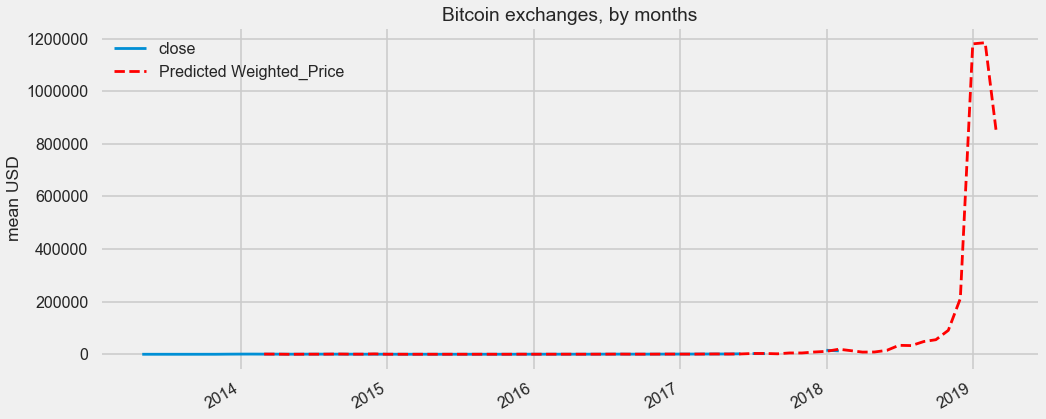

In [291]:
#  Prediction
bitcoinDataset_month2 = bitcoinDataset_month[['close']]
# df = pd.DataFrame(invboxcox(best_model.predict(start=10, end=80), lmbda), columns = ['forecast'])
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
             datetime(2018, 2, 28), datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31),
             datetime(2018, 6, 30), datetime(2018, 7, 31), datetime(2018, 8, 31), datetime(2018, 9, 30), 
            datetime(2018, 10, 31), datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), 
            datetime(2019, 2, 28)]

future = pd.DataFrame(index=date_list, columns= bitcoinDataset_month.columns)
bitcoinDataset_month2 = pd.concat([bitcoinDataset_month2, future])
# bitcoinDataset_month2['forecast'] = df['forecast']
bitcoinDataset_month2['forecast'] = invboxcox(best_model.predict(start=10, end=80), lmbda)
# bitcoinDataset_month2['forecast'] = best_model.predict(start=10, end=80)
plt.figure(figsize=(15,7))
bitcoinDataset_month2.close.plot()
bitcoinDataset_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

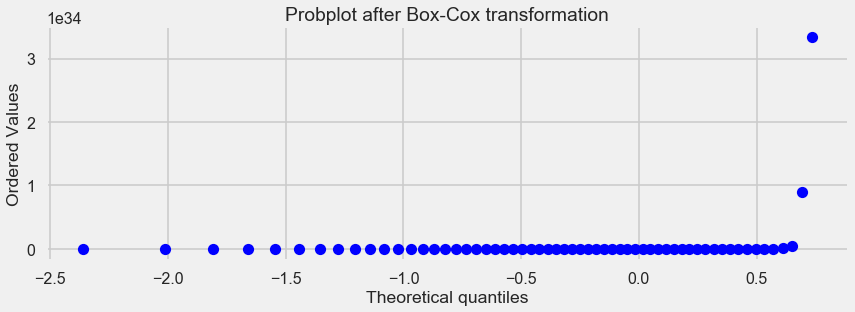

In [293]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
xt, lmbda = stats.boxcox(bitcoinDataset_month2.close)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()